# UFC Classification Project by Luigi Fiori



For this project, we will be dealing with a classification problem. 

![https://raw.githubusercontent.com/illumi91/dsc-mod-4-project-online-ds-pt-051319/master/zillow%20project/246x0w.jpg](https://raw.githubusercontent.com/illumi91/dsc-mod-4-project-online-ds-pt-051319/master/zillow%20project/246x0w.jpg)

I will be acting as a consultant for a bet site firm.

Our goal is to create a Machine Learning Model such that we can get some valuable predictions for our company.
In particular we will be working with UFC data containing information about fights from 1993 up till today.

The Database can be found in Keggle and I leave a link here.

We'll be following the OSEMN methodology:

1.Obtain

2.Scrub

3.Explore

4.Model

5.Interpret

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.tree import export_graphviz
from IPython.display import Image  

# Load the Data

In [2]:
df = pd.read_csv('data_93.csv')
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Columns: 145 entries, R_fighter to R_age
dtypes: bool(1), float64(134), int64(1), object(9)
memory usage: 5.7+ MB


In [4]:
list(df.columns)

['R_fighter',
 'B_fighter',
 'Referee',
 'date',
 'location',
 'Winner',
 'title_bout',
 'weight_class',
 'no_of_rounds',
 'B_current_lose_streak',
 'B_current_win_streak',
 'B_draw',
 'B_avg_BODY_att',
 'B_avg_BODY_landed',
 'B_avg_CLINCH_att',
 'B_avg_CLINCH_landed',
 'B_avg_DISTANCE_att',
 'B_avg_DISTANCE_landed',
 'B_avg_GROUND_att',
 'B_avg_GROUND_landed',
 'B_avg_HEAD_att',
 'B_avg_HEAD_landed',
 'B_avg_KD',
 'B_avg_LEG_att',
 'B_avg_LEG_landed',
 'B_avg_PASS',
 'B_avg_REV',
 'B_avg_SIG_STR_att',
 'B_avg_SIG_STR_landed',
 'B_avg_SIG_STR_pct',
 'B_avg_SUB_ATT',
 'B_avg_TD_att',
 'B_avg_TD_landed',
 'B_avg_TD_pct',
 'B_avg_TOTAL_STR_att',
 'B_avg_TOTAL_STR_landed',
 'B_longest_win_streak',
 'B_losses',
 'B_avg_opp_BODY_att',
 'B_avg_opp_BODY_landed',
 'B_avg_opp_CLINCH_att',
 'B_avg_opp_CLINCH_landed',
 'B_avg_opp_DISTANCE_att',
 'B_avg_opp_DISTANCE_landed',
 'B_avg_opp_GROUND_att',
 'B_avg_opp_GROUND_landed',
 'B_avg_opp_HEAD_att',
 'B_avg_opp_HEAD_landed',
 'B_avg_opp_KD',
 'B_av

In [5]:
df['win_by']

KeyError: 'win_by'

In [5]:
df = df[df.columns.drop(list(df.filter(regex='opp')))]

In [6]:
list(df.columns)

['R_fighter',
 'B_fighter',
 'Referee',
 'date',
 'location',
 'Winner',
 'title_bout',
 'weight_class',
 'no_of_rounds',
 'B_current_lose_streak',
 'B_current_win_streak',
 'B_draw',
 'B_avg_BODY_att',
 'B_avg_BODY_landed',
 'B_avg_CLINCH_att',
 'B_avg_CLINCH_landed',
 'B_avg_DISTANCE_att',
 'B_avg_DISTANCE_landed',
 'B_avg_GROUND_att',
 'B_avg_GROUND_landed',
 'B_avg_HEAD_att',
 'B_avg_HEAD_landed',
 'B_avg_KD',
 'B_avg_LEG_att',
 'B_avg_LEG_landed',
 'B_avg_PASS',
 'B_avg_REV',
 'B_avg_SIG_STR_att',
 'B_avg_SIG_STR_landed',
 'B_avg_SIG_STR_pct',
 'B_avg_SUB_ATT',
 'B_avg_TD_att',
 'B_avg_TD_landed',
 'B_avg_TD_pct',
 'B_avg_TOTAL_STR_att',
 'B_avg_TOTAL_STR_landed',
 'B_longest_win_streak',
 'B_losses',
 'B_total_rounds_fought',
 'B_total_time_fought(seconds)',
 'B_total_title_bouts',
 'B_win_by_Decision_Majority',
 'B_win_by_Decision_Split',
 'B_win_by_Decision_Unanimous',
 'B_win_by_KO/TKO',
 'B_win_by_Submission',
 'B_wins',
 'B_Stance',
 'B_Height_cms',
 'B_Reach_cms',
 'B_Weigh

Let's check the labels present in the 'Winner' column.

In [7]:
df['Winner'].value_counts(normalize=True)

Red     0.674572
Blue    0.309292
Draw    0.016135
Name: Winner, dtype: float64

Next step is to remove the 'Draw' label being  representative of less than 2% of the overall data.

In [8]:
df = df[df['Winner'] != 'Draw']
df['Winner'].value_counts(normalize=True)

Red     0.685635
Blue    0.314365
Name: Winner, dtype: float64

In [9]:
#for x in df_2003.columns:
 #   if 'Round1' in x:
  #      df_2003.dropna(subset=[x], inplace=True)

# EDA

We are going to check the Nan values and deal with them based on the information we have.

In [10]:
df.isnull().sum()

R_fighter                          0
B_fighter                          0
Referee                           22
date                               0
location                           0
Winner                             0
title_bout                         0
weight_class                       0
no_of_rounds                       0
B_current_lose_streak              0
B_current_win_streak               0
B_draw                             0
B_avg_BODY_att                  1241
B_avg_BODY_landed               1241
B_avg_CLINCH_att                1241
B_avg_CLINCH_landed             1241
B_avg_DISTANCE_att              1241
B_avg_DISTANCE_landed           1241
B_avg_GROUND_att                1241
B_avg_GROUND_landed             1241
B_avg_HEAD_att                  1241
B_avg_HEAD_landed               1241
B_avg_KD                        1241
B_avg_LEG_att                   1241
B_avg_LEG_landed                1241
B_avg_PASS                      1241
B_avg_REV                       1241
B

As we can see we miss some data.

Most of them are on old.

In this case unfortunately we have to drop the relative rows because we are not able to get back those information.

In [11]:
df.dropna(inplace=True)
df.isnull().sum()

R_fighter                       0
B_fighter                       0
Referee                         0
date                            0
location                        0
Winner                          0
title_bout                      0
weight_class                    0
no_of_rounds                    0
B_current_lose_streak           0
B_current_win_streak            0
B_draw                          0
B_avg_BODY_att                  0
B_avg_BODY_landed               0
B_avg_CLINCH_att                0
B_avg_CLINCH_landed             0
B_avg_DISTANCE_att              0
B_avg_DISTANCE_landed           0
B_avg_GROUND_att                0
B_avg_GROUND_landed             0
B_avg_HEAD_att                  0
B_avg_HEAD_landed               0
B_avg_KD                        0
B_avg_LEG_att                   0
B_avg_LEG_landed                0
B_avg_PASS                      0
B_avg_REV                       0
B_avg_SIG_STR_att               0
B_avg_SIG_STR_landed            0
B_avg_SIG_STR_

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3151 entries, 0 to 5008
Data columns (total 95 columns):
R_fighter                       3151 non-null object
B_fighter                       3151 non-null object
Referee                         3151 non-null object
date                            3151 non-null object
location                        3151 non-null object
Winner                          3151 non-null object
title_bout                      3151 non-null bool
weight_class                    3151 non-null object
no_of_rounds                    3151 non-null int64
B_current_lose_streak           3151 non-null float64
B_current_win_streak            3151 non-null float64
B_draw                          3151 non-null float64
B_avg_BODY_att                  3151 non-null float64
B_avg_BODY_landed               3151 non-null float64
B_avg_CLINCH_att                3151 non-null float64
B_avg_CLINCH_landed             3151 non-null float64
B_avg_DISTANCE_att              3151 non-

# Features importance through Random Forest

At this point I want to be able to check between all the features that I have those features more important in terms of overall impact.

To do so I'm going to create a Random Forest Model so that I can first look at the most important features in order to have a starting point for my model.

In [13]:
df.head(3)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,4.0,2.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,2.0,0.0,2.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,3.0,6.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0


In [14]:
X = df.drop('Winner', axis=1)
y = df['Winner']

I need to remove to column that are 'object' because the Machine Model can't handle 'strings'.

In [15]:
X = X.select_dtypes(exclude=['object'])
list(X.dtypes)

[dtype('bool'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [17]:
# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = clf.fit(X_train, y_train)

C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


After fitting our model we are going to create a dictionary to hold our sorted features so that we can have a better understanding on the features importance.

In [18]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance',ascending=False,inplace=True)
importances.head(30)
#importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45, figsize=(12,8))

,Gini-importance
R_avg_GROUND_landed,0.021922
B_avg_HEAD_landed,0.021324
R_avg_SIG_STR_pct,0.020784
R_total_time_fought(seconds),0.020753
B_avg_BODY_att,0.020543
B_total_time_fought(seconds),0.019827
B_avg_DISTANCE_att,0.019350
B_avg_HEAD_att,0.018842
B_avg_TOTAL_STR_att,0.018837
R_avg_SIG_STR_landed,0.018744


Here on top we can see our 30 best features for our model.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3151 entries, 0 to 5008
Data columns (total 95 columns):
R_fighter                       3151 non-null object
B_fighter                       3151 non-null object
Referee                         3151 non-null object
date                            3151 non-null object
location                        3151 non-null object
Winner                          3151 non-null object
title_bout                      3151 non-null bool
weight_class                    3151 non-null object
no_of_rounds                    3151 non-null int64
B_current_lose_streak           3151 non-null float64
B_current_win_streak            3151 non-null float64
B_draw                          3151 non-null float64
B_avg_BODY_att                  3151 non-null float64
B_avg_BODY_landed               3151 non-null float64
B_avg_CLINCH_att                3151 non-null float64
B_avg_CLINCH_landed             3151 non-null float64
B_avg_DISTANCE_att              3151 non-

## Subtract Blue fighters columns to Red fighter columns for different features.

My intention through this process is to possibly find some new more important and valuable features for the model that we'll build later on.

We will start with physical features related to body components of the body such weight, height and so on.

Later we will deal with features related to various type of strikes, like on the ground, standing etc.

In [20]:
df['WEIGHT_DIFF'] = df['R_Weight_lbs'] \
                        - df['B_Weight_lbs']

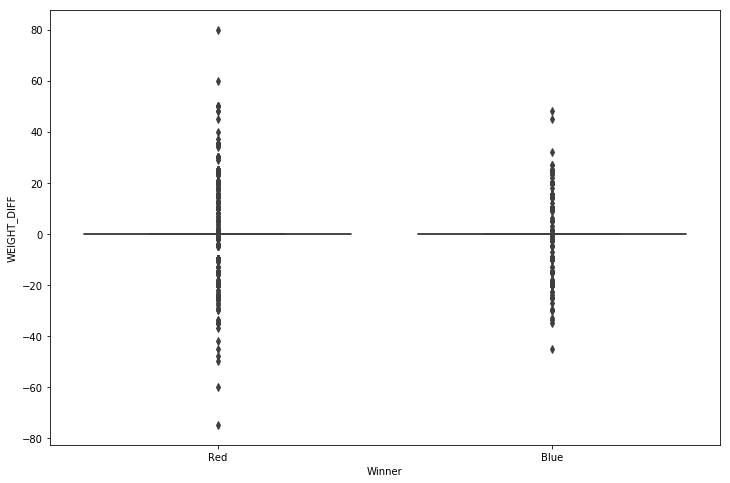

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'WEIGHT_DIFF', data=df);

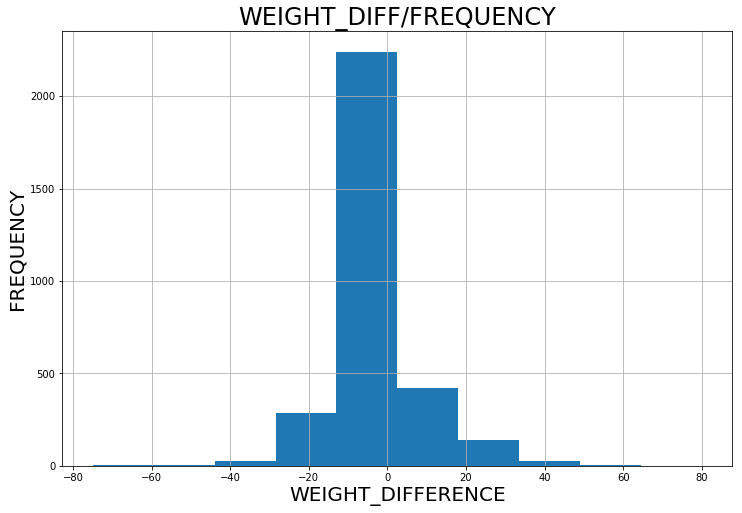

In [22]:
plt.figure(figsize=(12,8))
df['WEIGHT_DIFF'].hist()
plt.xlabel('WEIGHT_DIFFERENCE', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('WEIGHT_DIFF/FREQUENCY', fontsize=24);

The fighter with more than 80 pounds difference is an outlier. Let's remove it.

In [23]:
df = df[df['WEIGHT_DIFF'] < 75]

In [24]:
df['REACH_DIFF'] = df['R_Reach_cms'] \
                        - df['B_Reach_cms']

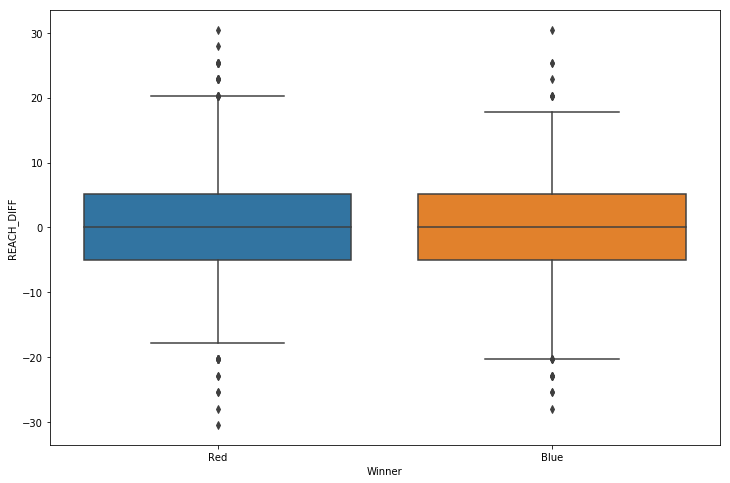

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'REACH_DIFF', data=df);

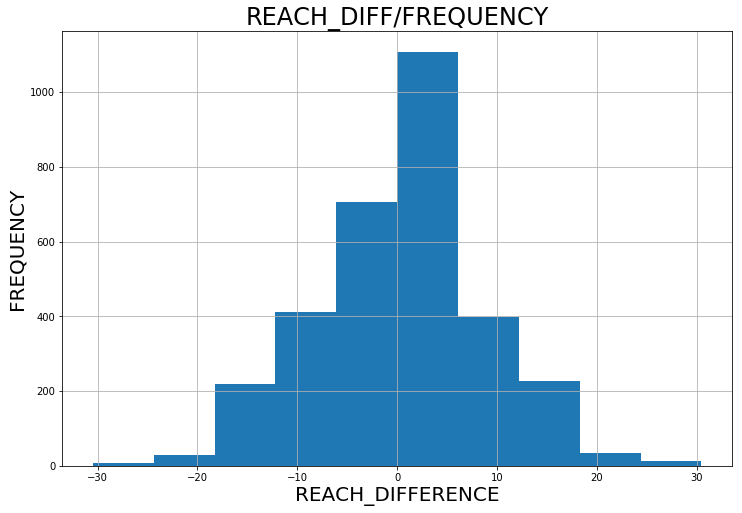

In [26]:
plt.figure(figsize=(12,8))
df['REACH_DIFF'].hist()
plt.xlabel('REACH_DIFFERENCE', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('REACH_DIFF/FREQUENCY', fontsize=24);

In [27]:
df['HEIGHT_DIFF'] = df['R_Height_cms'] \
                        - df['B_Height_cms']

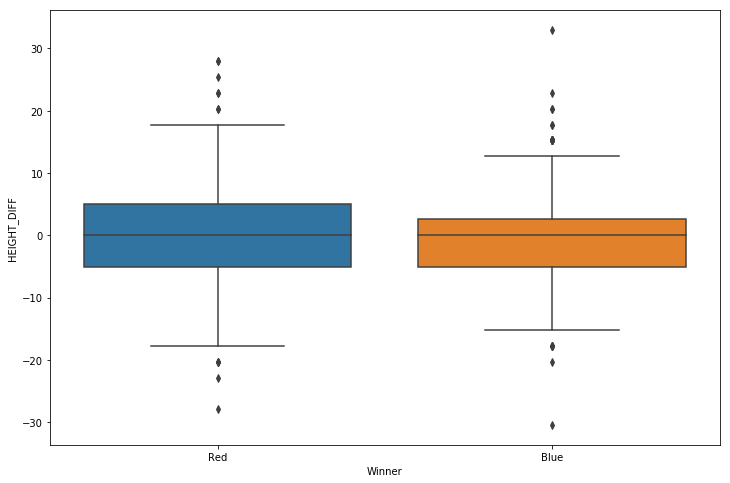

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'HEIGHT_DIFF', data=df);

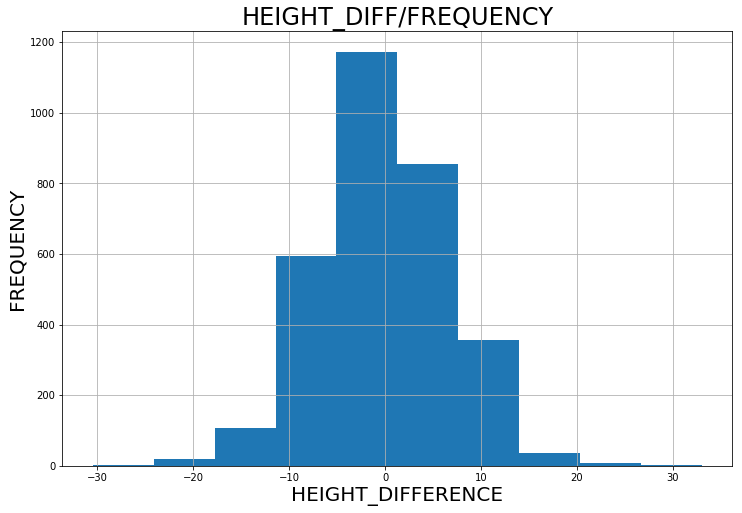

In [29]:
plt.figure(figsize=(12,8))
df['HEIGHT_DIFF'].hist()
plt.xlabel('HEIGHT_DIFFERENCE', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('HEIGHT_DIFF/FREQUENCY', fontsize=24);

In [30]:
df['AGE_DIFF'] = df['R_age'] \
                        - df['B_age']

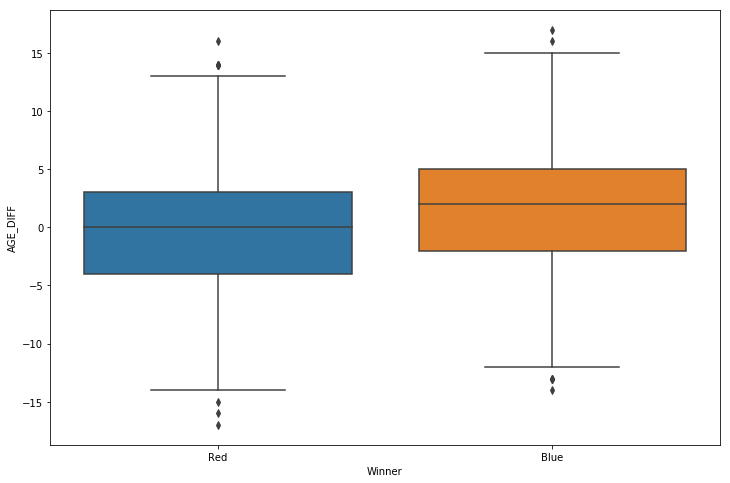

In [31]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'AGE_DIFF', data=df);

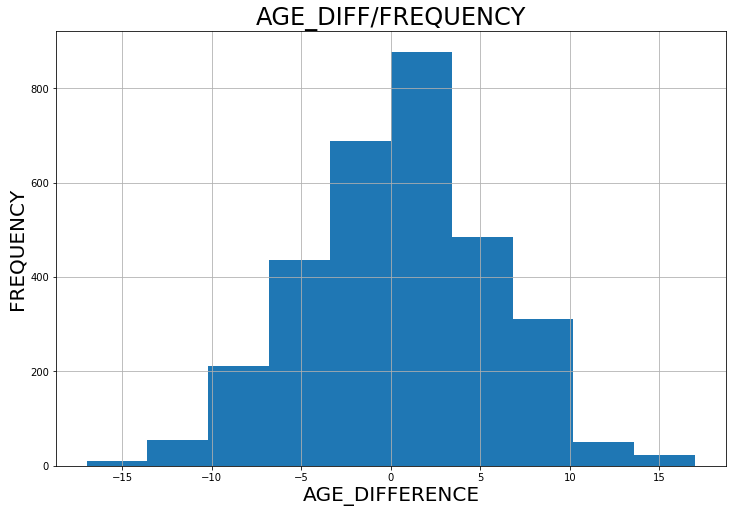

In [32]:
plt.figure(figsize=(12,8))
df['AGE_DIFF'].hist()
plt.xlabel('AGE_DIFFERENCE', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('AGE_DIFF/FREQUENCY', fontsize=24);

In [33]:
df['KO_DIFF'] = df['R_avg_KD'] \
                        - df['B_avg_KD']

In [ ]:
B_avg_KD

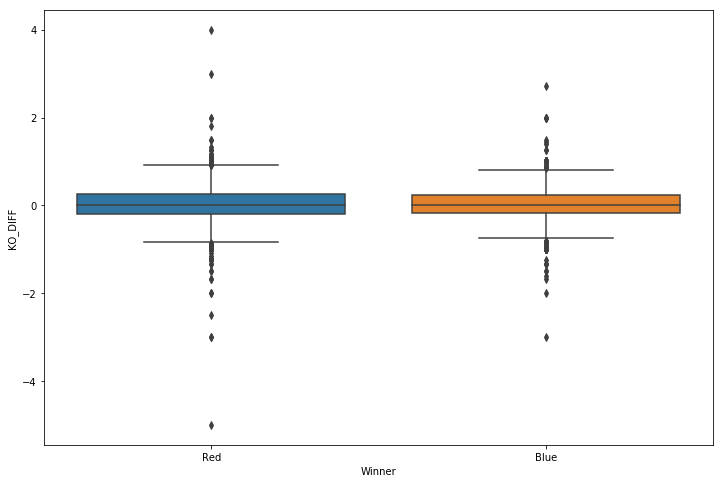

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'KO_DIFF', data=df);

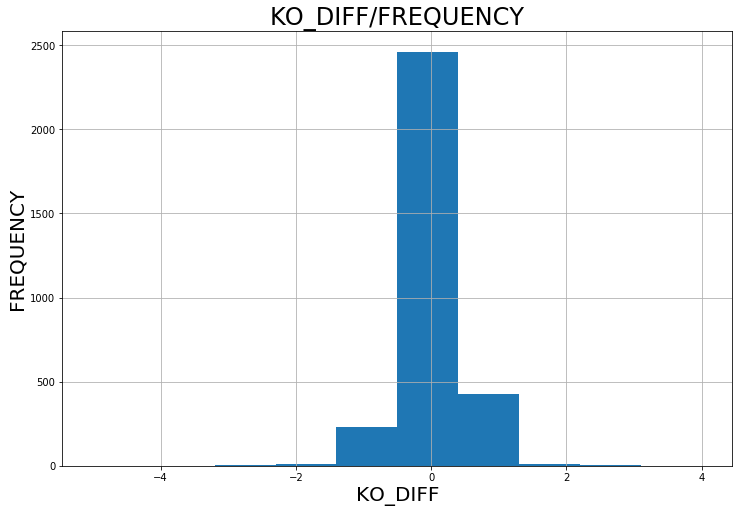

In [35]:
plt.figure(figsize=(12,8))
df['KO_DIFF'].hist()
plt.xlabel('KO_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('KO_DIFF/FREQUENCY', fontsize=24);

In [36]:
df['TOT_STR_DIFF'] = df['R_avg_TOTAL_STR_landed'] \
                        - df['B_avg_TOTAL_STR_landed']

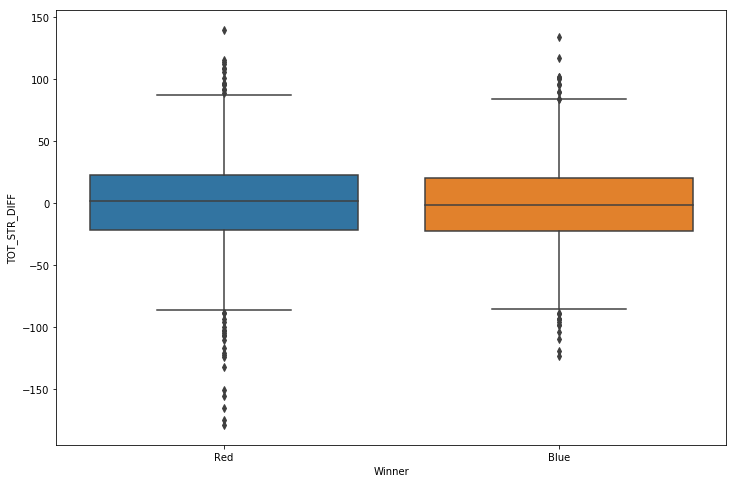

In [37]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'TOT_STR_DIFF', data=df);

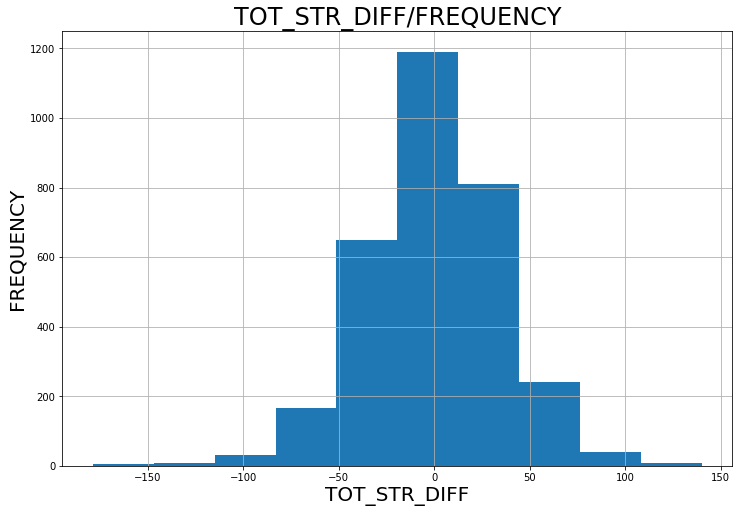

In [38]:
plt.figure(figsize=(12,8))
df['TOT_STR_DIFF'].hist()
plt.xlabel('TOT_STR_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('TOT_STR_DIFF/FREQUENCY', fontsize=24);

In [39]:
df['TOT_STR_ATT_DIFF'] = df['R_avg_TOTAL_STR_att'] \
                        - df['B_avg_TOTAL_STR_att']

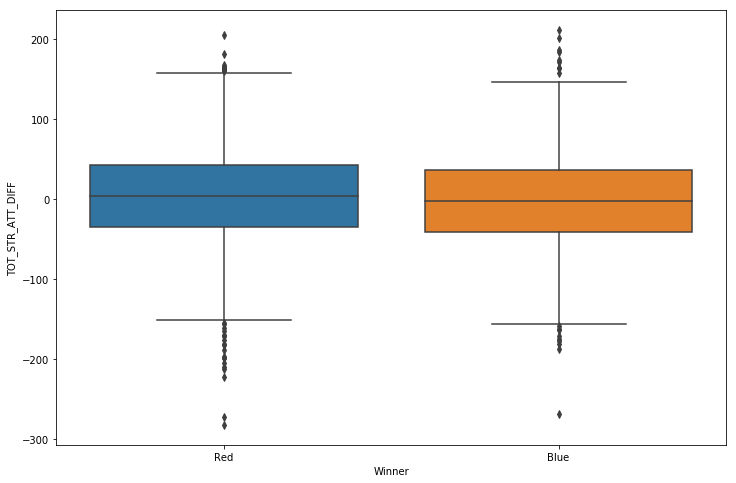

In [40]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'TOT_STR_ATT_DIFF', data=df);

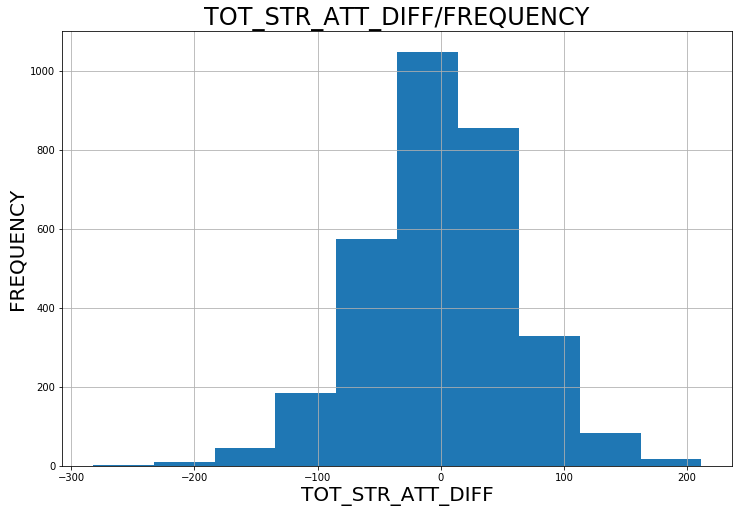

In [41]:
plt.figure(figsize=(12,8))
df['TOT_STR_ATT_DIFF'].hist()
plt.xlabel('TOT_STR_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('TOT_STR_ATT_DIFF/FREQUENCY', fontsize=24);

In [42]:
df['DIST_STRIKE_DIFF'] = df['R_avg_DISTANCE_landed'] \
                        - df['B_avg_DISTANCE_landed']

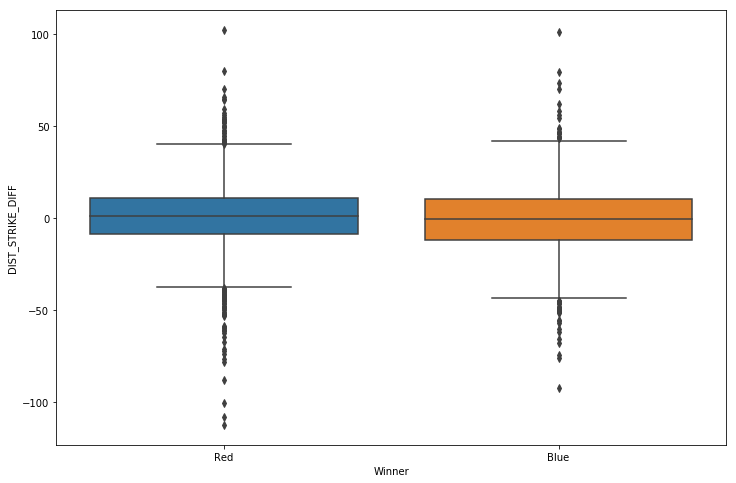

In [43]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'DIST_STRIKE_DIFF', data=df);

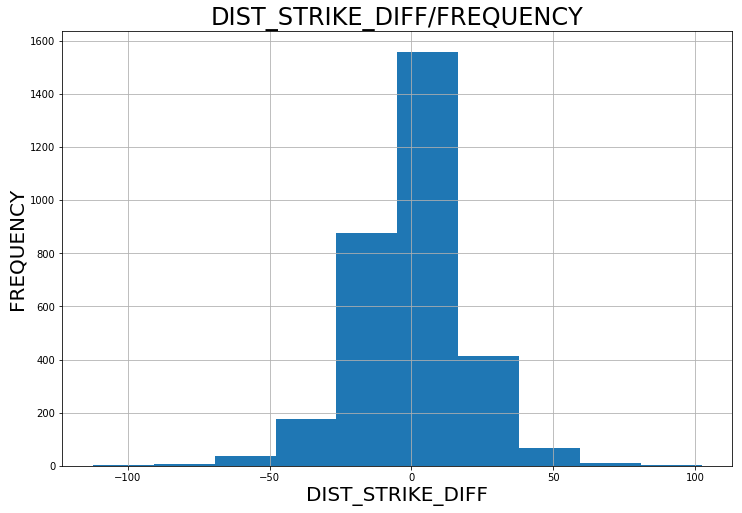

In [44]:
plt.figure(figsize=(12,8))
df['DIST_STRIKE_DIFF'].hist()
plt.xlabel('DIST_STRIKE_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('DIST_STRIKE_DIFF/FREQUENCY', fontsize=24);

In [45]:
df['DIST_STRIKE_ATT_DIFF'] = df['R_avg_DISTANCE_att'] \
                        - df['B_avg_DISTANCE_att']

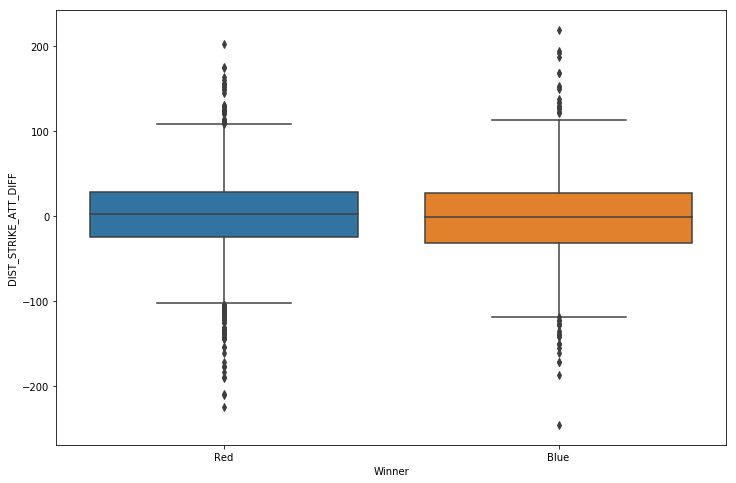

In [46]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'DIST_STRIKE_ATT_DIFF', data=df);

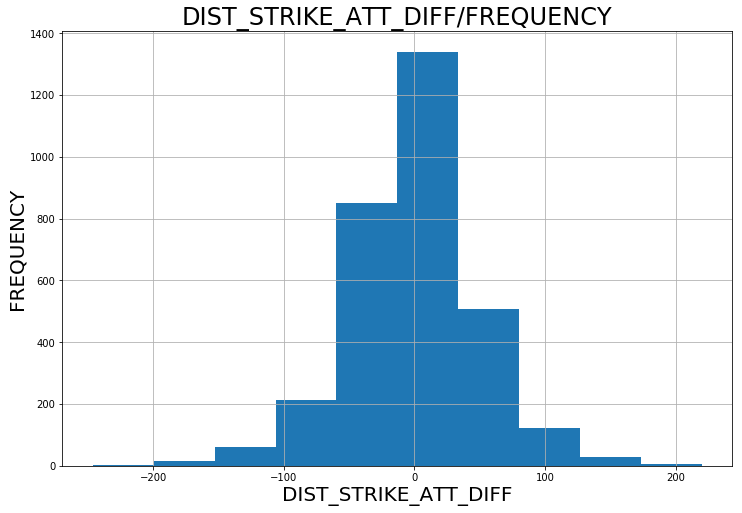

In [47]:
plt.figure(figsize=(12,8))
df['DIST_STRIKE_ATT_DIFF'].hist()
plt.xlabel('DIST_STRIKE_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('DIST_STRIKE_ATT_DIFF/FREQUENCY', fontsize=24);

In [48]:
df['PASS_DIFF'] = df['R_avg_PASS'] \
                        - df['B_avg_PASS']

In [ ]:
B_avg_CLINCH_landed

In [ ]:
B_avg_LEG_landed

In [ ]:
 'B_avg_PASS',
 'B_avg_REV',

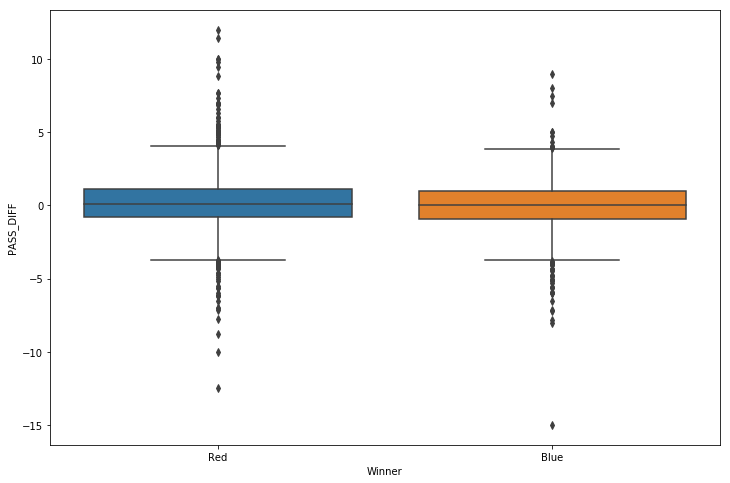

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'PASS_DIFF', data=df);

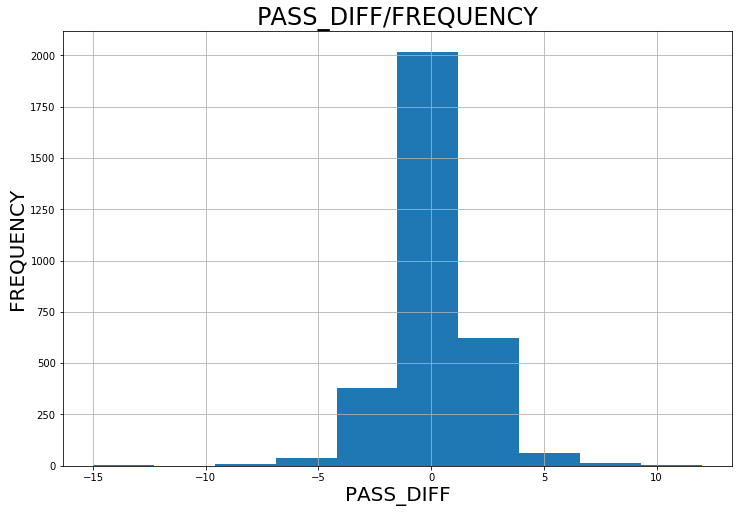

In [50]:
plt.figure(figsize=(12,8))
df['PASS_DIFF'].hist()
plt.xlabel('PASS_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('PASS_DIFF/FREQUENCY', fontsize=24);

In [51]:
df['REV_DIFF'] = df['R_avg_REV'] \
                        - df['B_avg_REV']

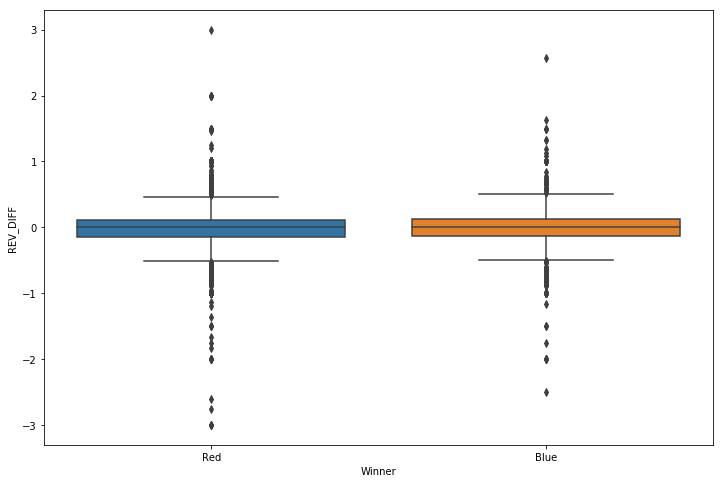

In [52]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'REV_DIFF', data=df);

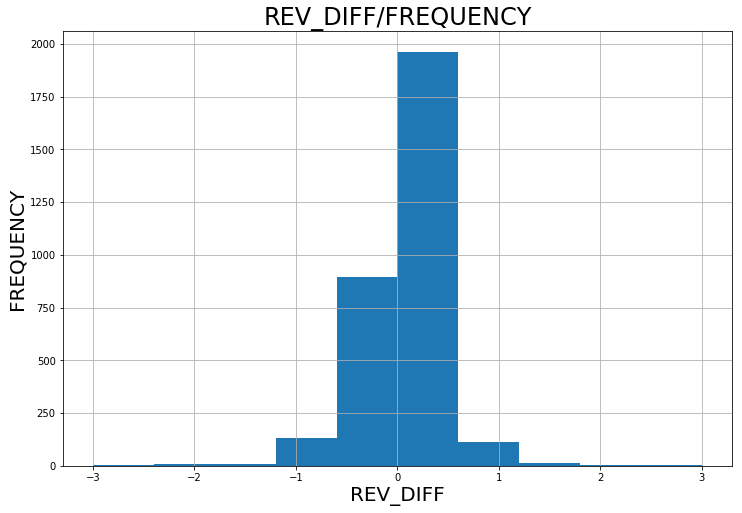

In [53]:
plt.figure(figsize=(12,8))
df['REV_DIFF'].hist()
plt.xlabel('REV_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('REV_DIFF/FREQUENCY', fontsize=24);

In [54]:
df['LEG_DIFF'] = df['R_avg_LEG_landed'] \
                        - df['B_avg_LEG_landed']

In [ ]:
x

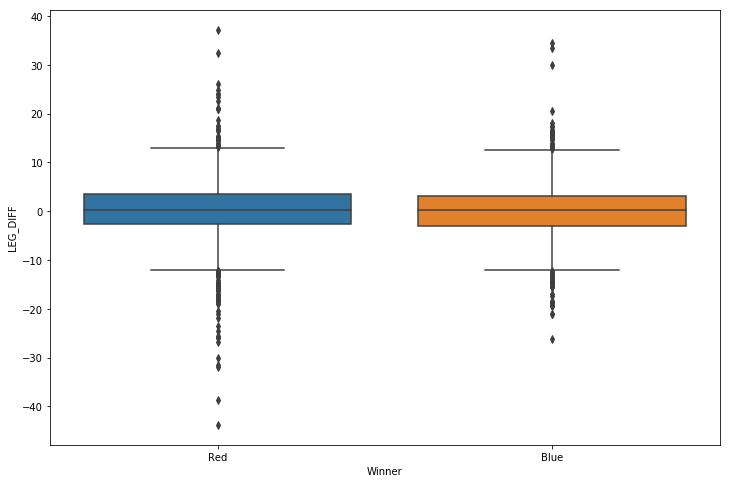

In [55]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'LEG_DIFF', data=df);

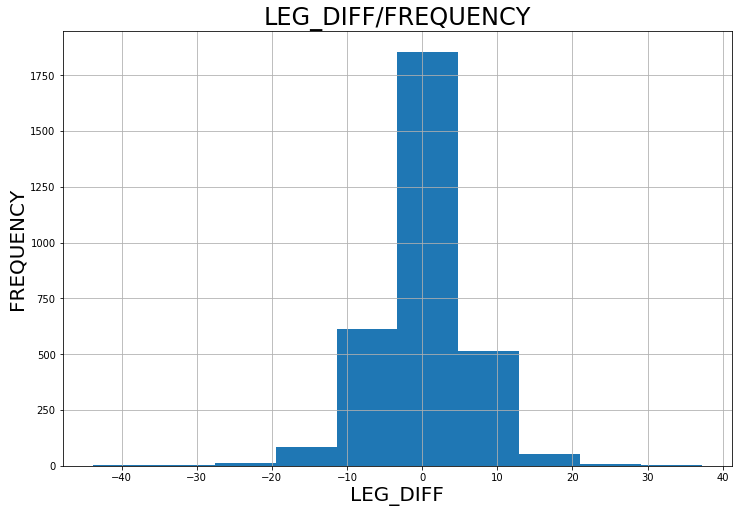

In [56]:
plt.figure(figsize=(12,8))
df['LEG_DIFF'].hist()
plt.xlabel('LEG_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('LEG_DIFF/FREQUENCY', fontsize=24);

In [57]:
df['LEG_ATT_DIFF'] = df['R_avg_LEG_att'] \
                        - df['B_avg_LEG_att']

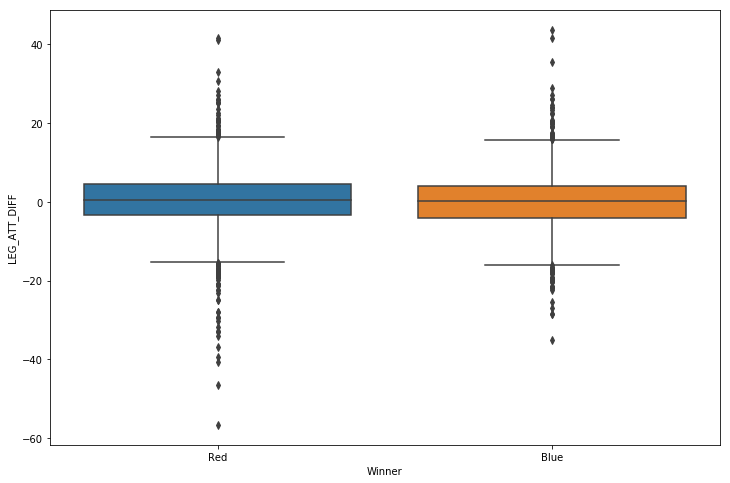

In [58]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'LEG_ATT_DIFF', data=df);

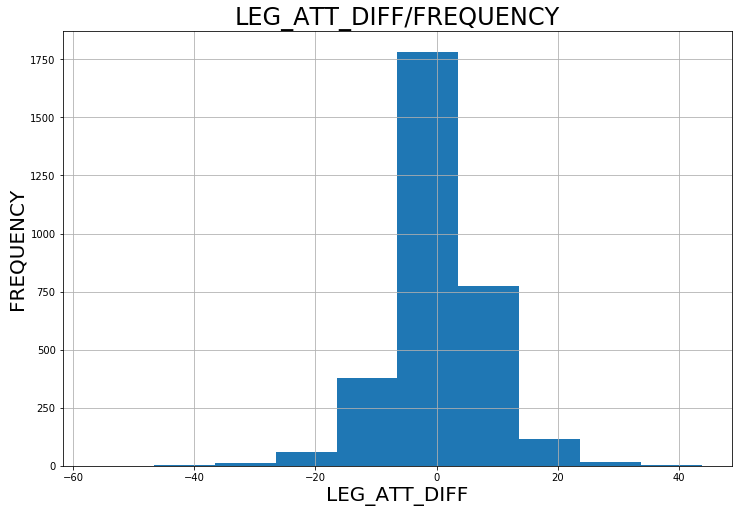

In [59]:
plt.figure(figsize=(12,8))
df['LEG_ATT_DIFF'].hist()
plt.xlabel('LEG_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('LEG_ATT_DIFF/FREQUENCY', fontsize=24);

In [60]:
df['CLINCH_DIFF'] = df['R_avg_CLINCH_landed'] \
                        - df['B_avg_CLINCH_landed']

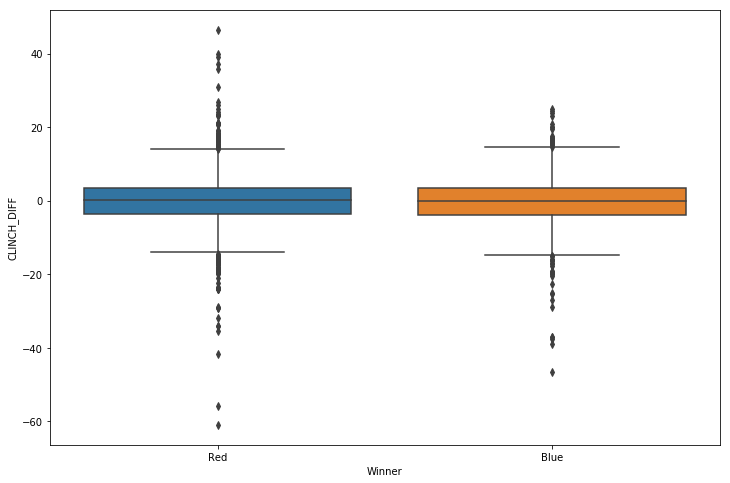

In [61]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'CLINCH_DIFF', data=df);

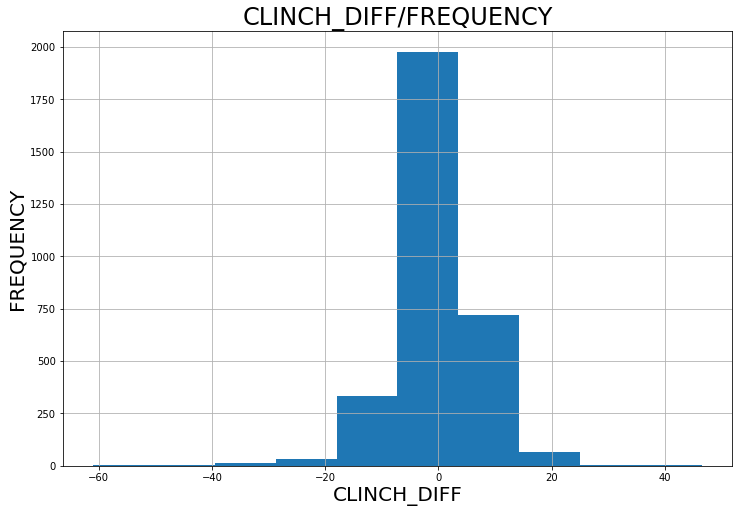

In [62]:
plt.figure(figsize=(12,8))
df['CLINCH_DIFF'].hist()
plt.xlabel('CLINCH_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('CLINCH_DIFF/FREQUENCY', fontsize=24);

In [63]:
df['CLINCH_ATT_DIFF'] = df['R_avg_CLINCH_att'] \
                        - df['B_avg_CLINCH_att']

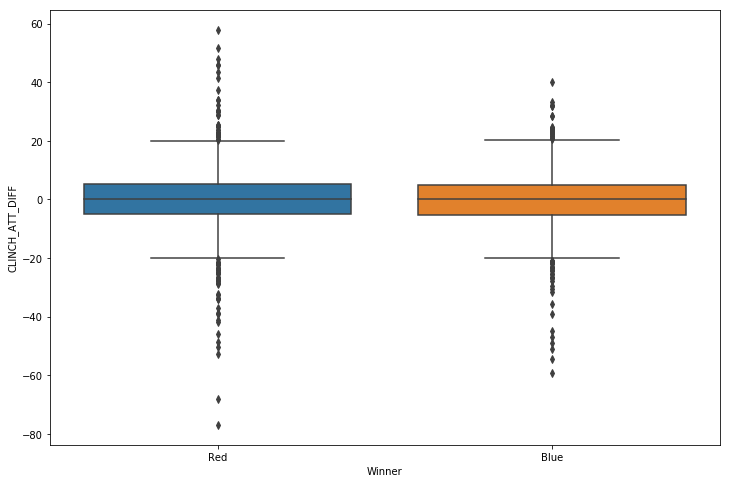

In [64]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'CLINCH_ATT_DIFF', data=df);

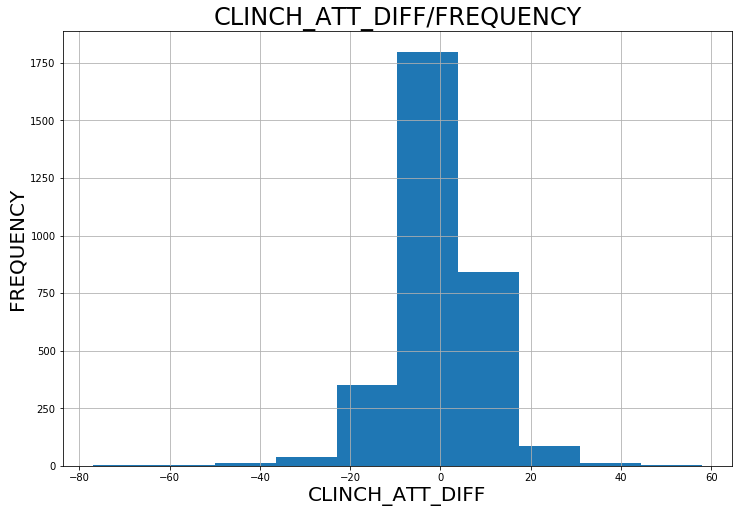

In [65]:
plt.figure(figsize=(12,8))
df['CLINCH_ATT_DIFF'].hist()
plt.xlabel('CLINCH_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('CLINCH_ATT_DIFF/FREQUENCY', fontsize=24);

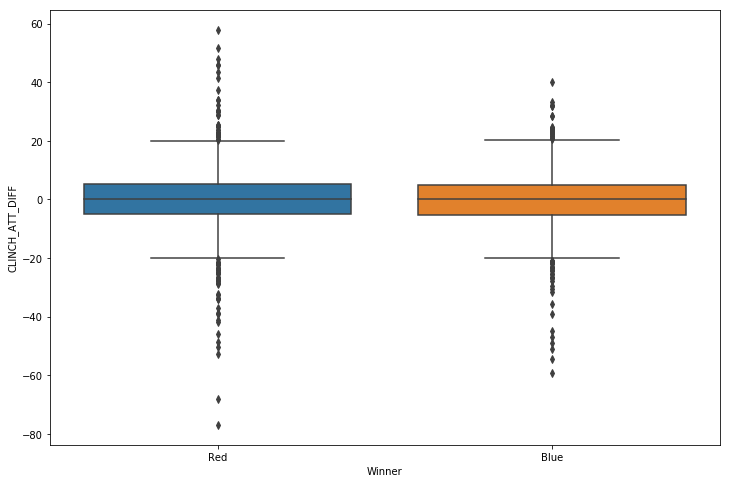

In [66]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'CLINCH_ATT_DIFF', data=df);

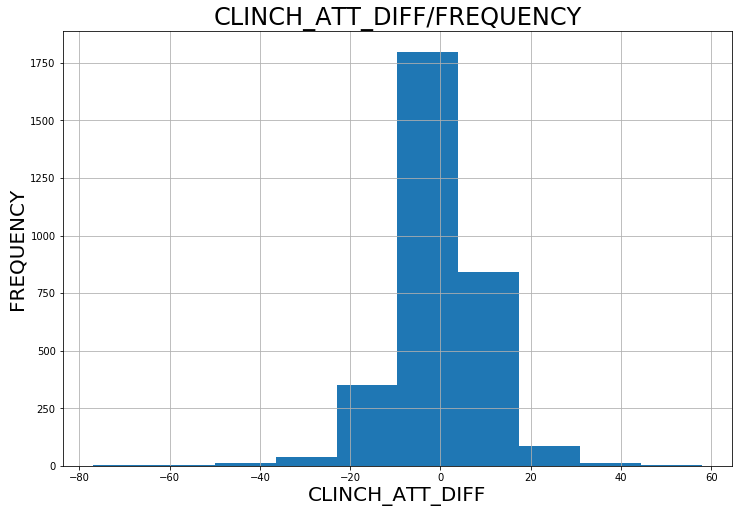

In [67]:
plt.figure(figsize=(12,8))
df['CLINCH_ATT_DIFF'].hist()
plt.xlabel('CLINCH_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('CLINCH_ATT_DIFF/FREQUENCY', fontsize=24);

In [68]:
df['BODY_STR_DIFF'] = df['R_avg_BODY_landed'] \
                        - df['B_avg_BODY_landed']

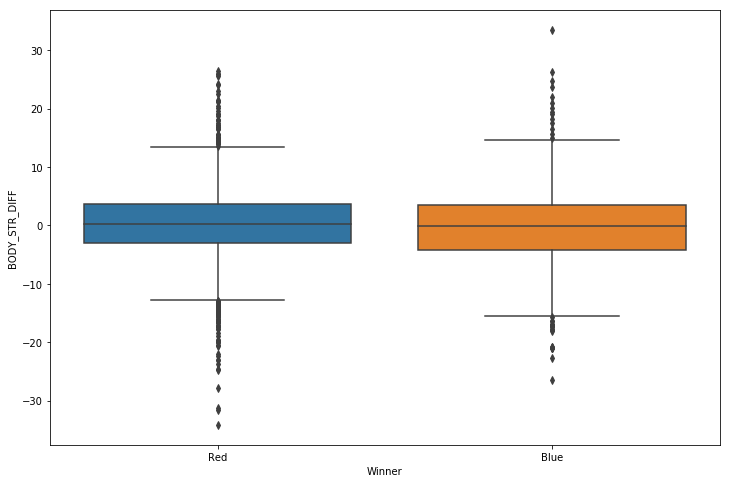

In [69]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'BODY_STR_DIFF', data=df);

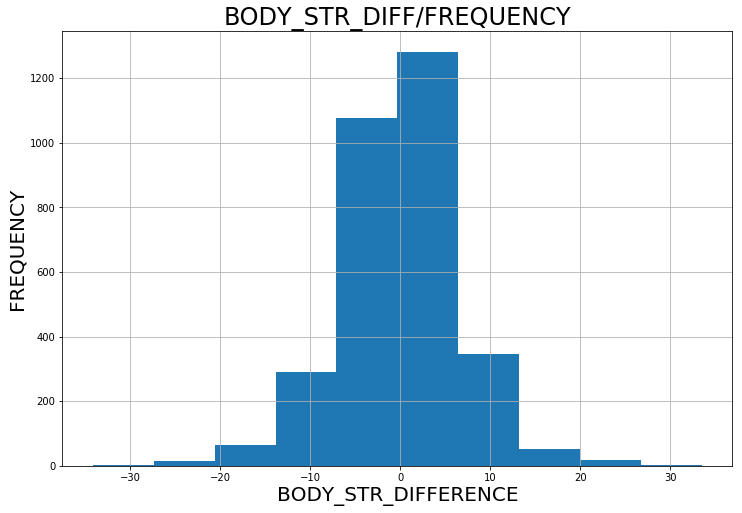

In [70]:
plt.figure(figsize=(12,8))
df['BODY_STR_DIFF'].hist()
plt.xlabel('BODY_STR_DIFFERENCE', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('BODY_STR_DIFF/FREQUENCY', fontsize=24);

In [71]:
df['BODY_STR_ATT_DIFF'] = df['R_avg_BODY_att'] \
                        - df['B_avg_BODY_att']

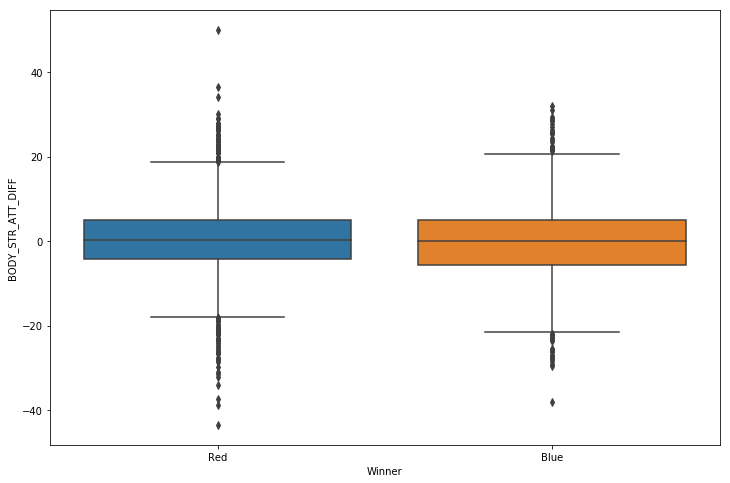

In [72]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'BODY_STR_ATT_DIFF', data=df);

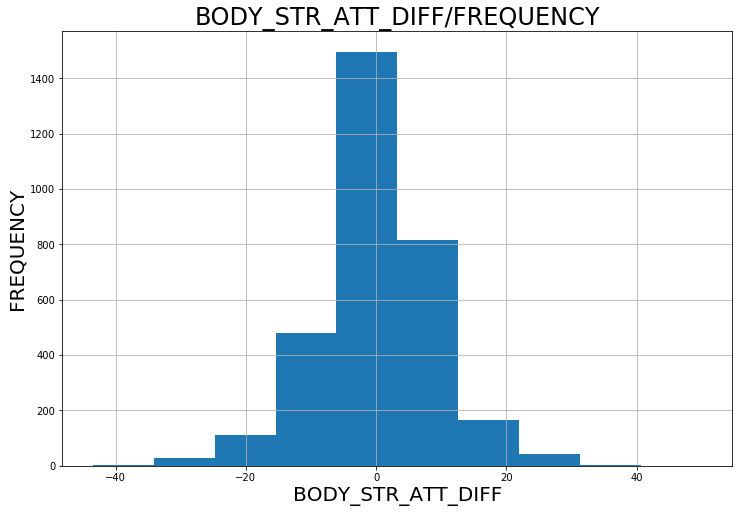

In [73]:
plt.figure(figsize=(12,8))
df['BODY_STR_ATT_DIFF'].hist()
plt.xlabel('BODY_STR_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('BODY_STR_ATT_DIFF/FREQUENCY', fontsize=24);

In [74]:
df['HEAD_STR_DIFF'] = df['R_avg_HEAD_landed'] \
                        - df['B_avg_HEAD_landed']

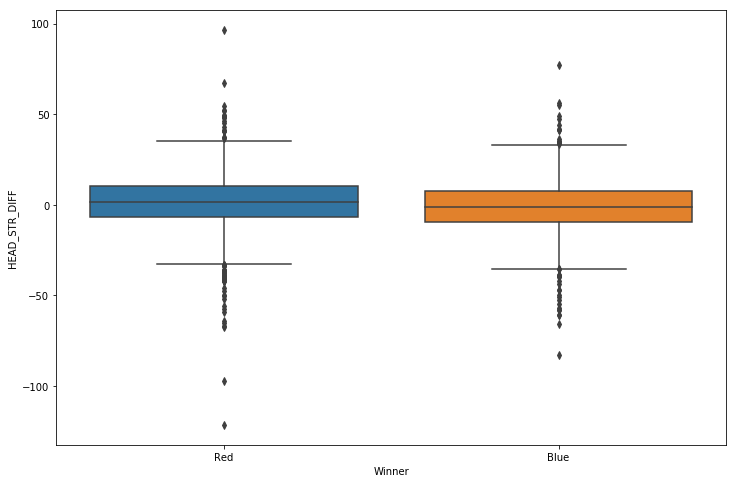

In [75]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'HEAD_STR_DIFF', data=df);

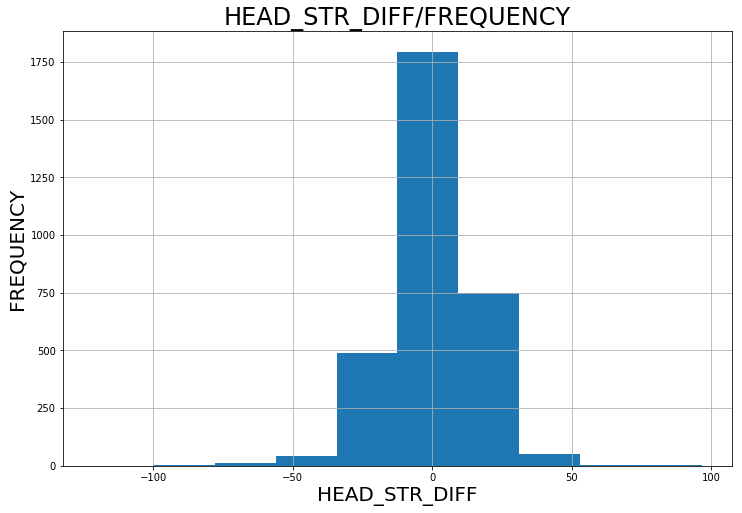

In [76]:
plt.figure(figsize=(12,8))
df['HEAD_STR_DIFF'].hist()
plt.xlabel('HEAD_STR_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('HEAD_STR_DIFF/FREQUENCY', fontsize=24);

In [77]:
df['HEAD_STR_ATT_DIFF'] = df['R_avg_HEAD_att'] \
                        - df['B_avg_HEAD_att']

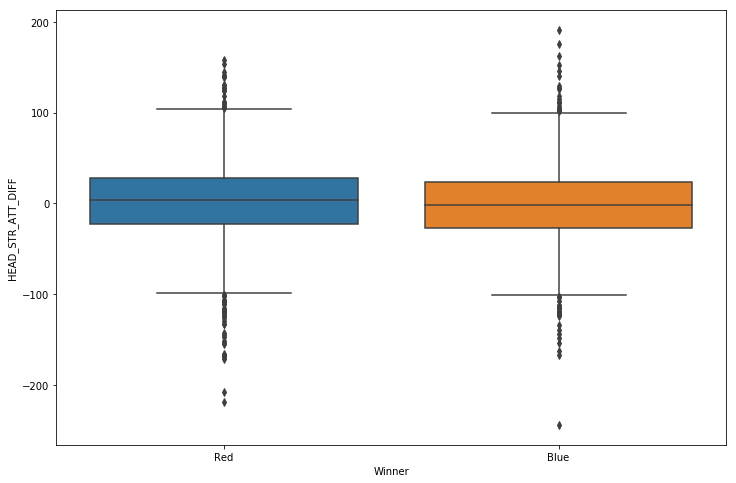

In [78]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'HEAD_STR_ATT_DIFF', data=df);

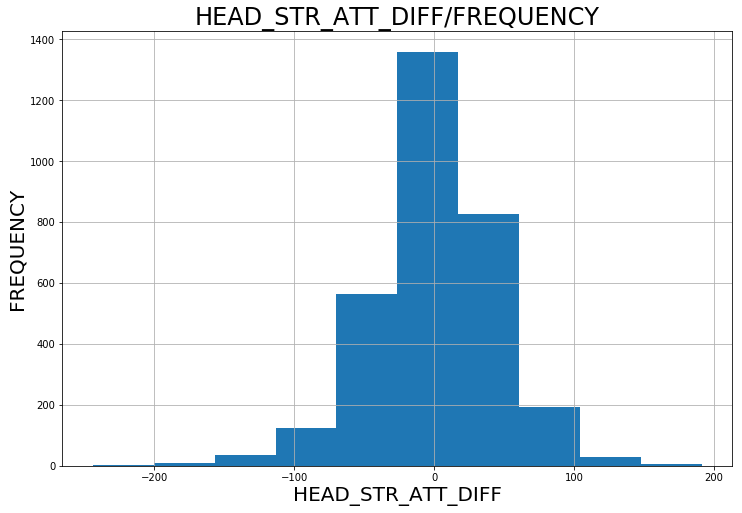

In [79]:
plt.figure(figsize=(12,8))
df['HEAD_STR_ATT_DIFF'].hist()
plt.xlabel('HEAD_STR_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('HEAD_STR_ATT_DIFF/FREQUENCY', fontsize=24);

In [80]:
df['GROUND_STR_DIFF'] = df['R_avg_GROUND_landed'] \
                        - df['B_avg_GROUND_landed']

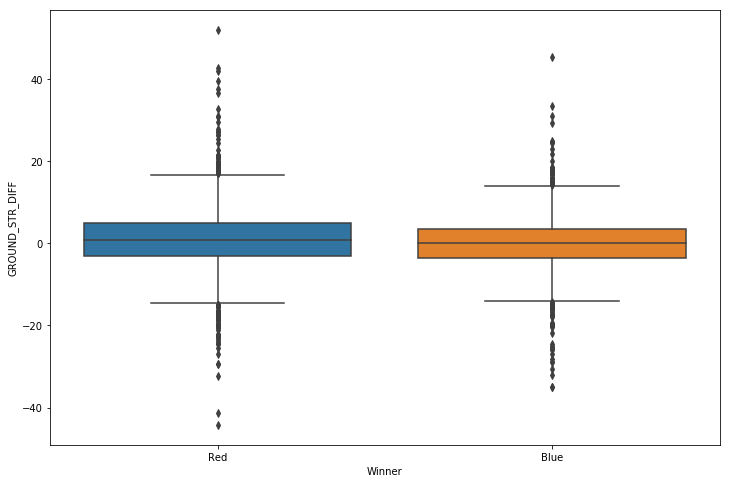

In [81]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'GROUND_STR_DIFF', data=df);

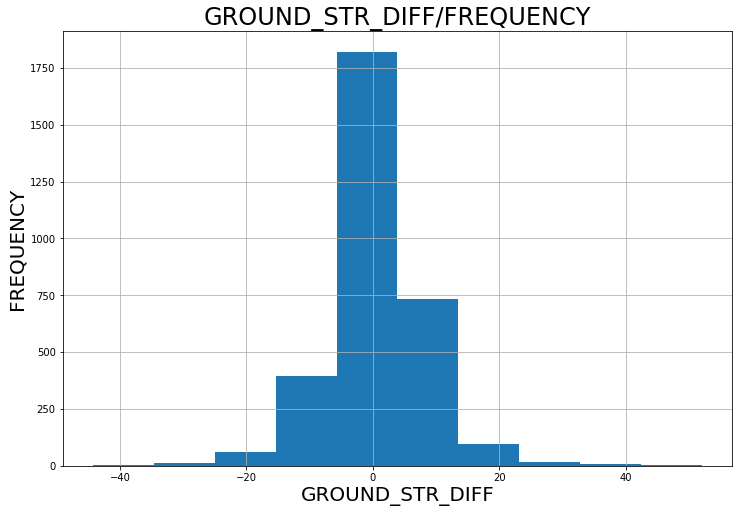

In [82]:
plt.figure(figsize=(12,8))
df['GROUND_STR_DIFF'].hist()
plt.xlabel('GROUND_STR_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('GROUND_STR_DIFF/FREQUENCY', fontsize=24);

In [83]:
df['GROUND_STR_ATT_DIFF'] = df['R_avg_GROUND_att'] \
                        - df['B_avg_GROUND_att']

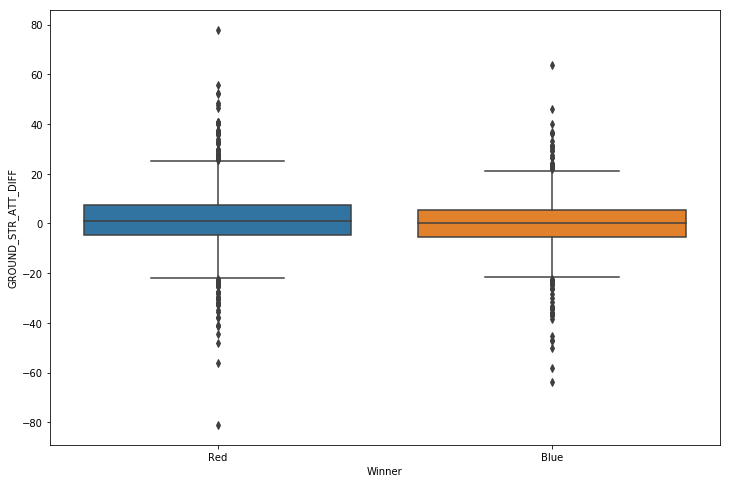

In [84]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'GROUND_STR_ATT_DIFF', data=df);

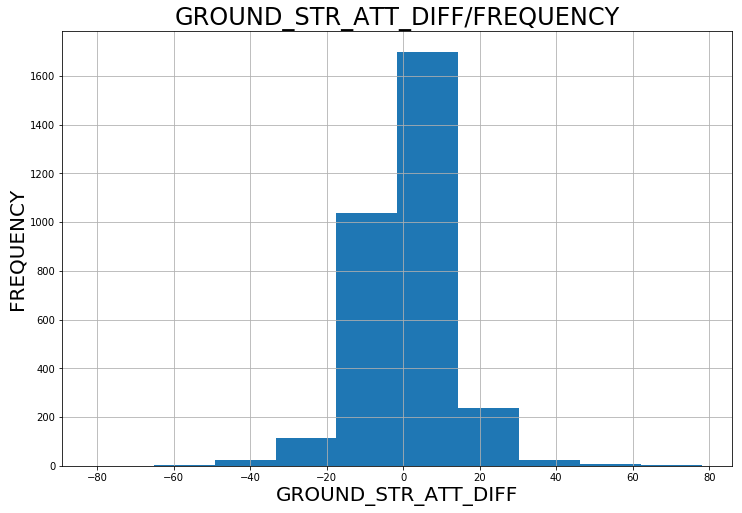

In [85]:
plt.figure(figsize=(12,8))
df['GROUND_STR_ATT_DIFF'].hist()
plt.xlabel('GROUND_STR_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('GROUND_STR_ATT_DIFF/FREQUENCY', fontsize=24);

In [86]:
df['SIG_STR_DIFF'] = df['R_avg_SIG_STR_landed'] \
                        - df['B_avg_SIG_STR_landed']

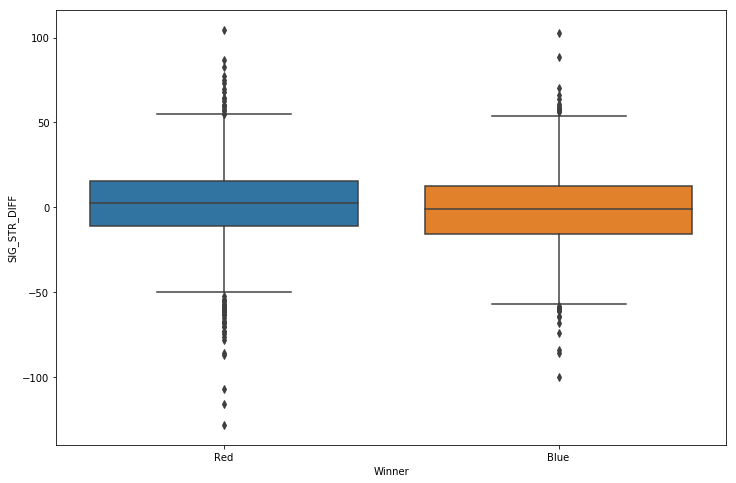

In [87]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'SIG_STR_DIFF', data=df);

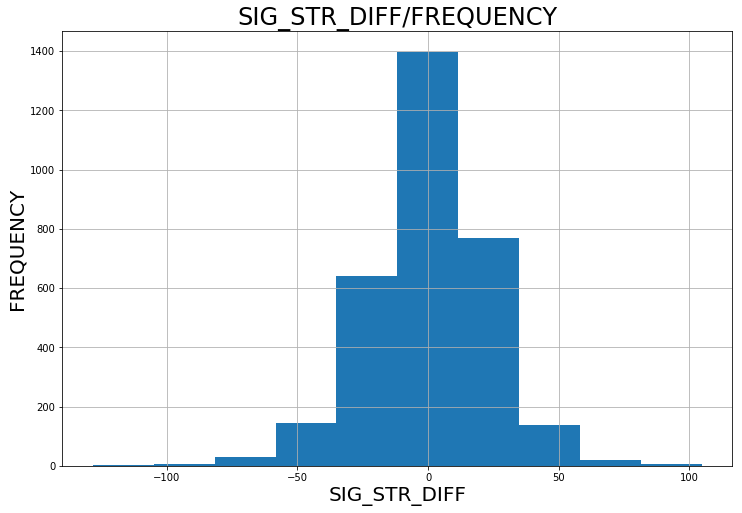

In [88]:
plt.figure(figsize=(12,8))
df['SIG_STR_DIFF'].hist()
plt.xlabel('SIG_STR_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('SIG_STR_DIFF/FREQUENCY', fontsize=24);

In [89]:
df['SIG_STR_ATT_DIFF'] = df['R_avg_SIG_STR_att'] \
                        - df['B_avg_SIG_STR_att']

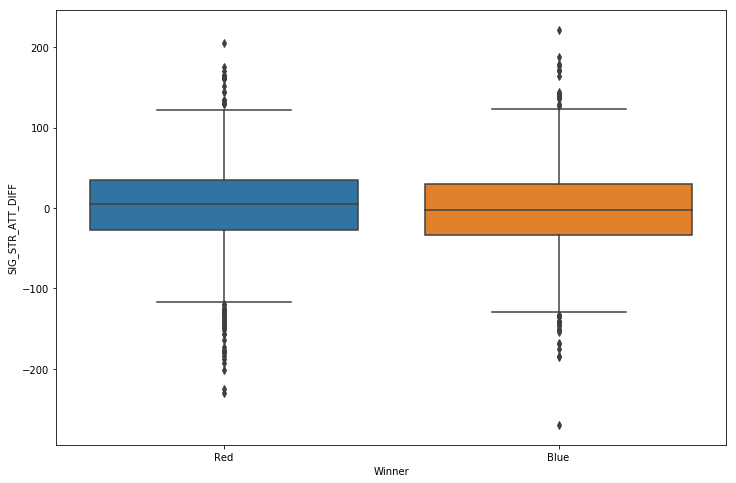

In [90]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'SIG_STR_ATT_DIFF', data=df);

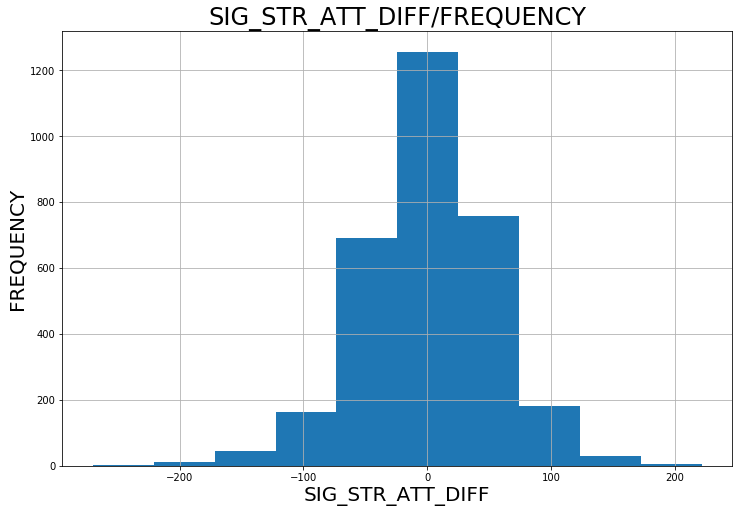

In [91]:
plt.figure(figsize=(12,8))
df['SIG_STR_ATT_DIFF'].hist()
plt.xlabel('SIG_STR_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('SIG_STR_ATT_DIFF/FREQUENCY', fontsize=24);

In [92]:
df['TAKEDOWN_DIFF'] = df['R_avg_TD_landed'] \
                        - df['B_avg_TD_landed']

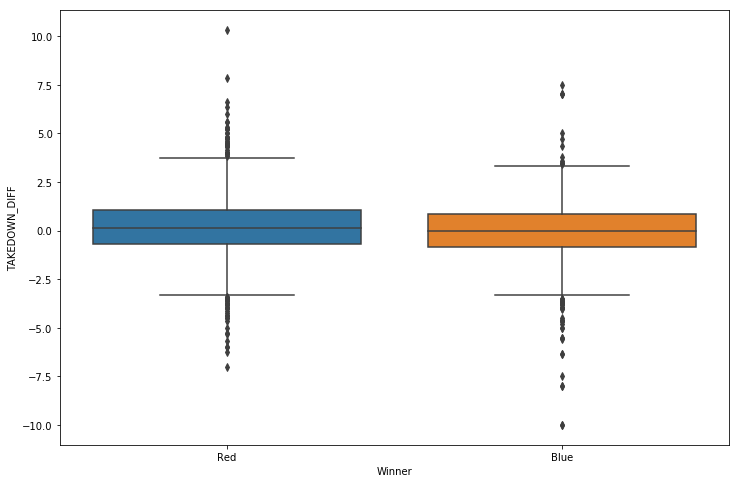

In [93]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'TAKEDOWN_DIFF', data=df);

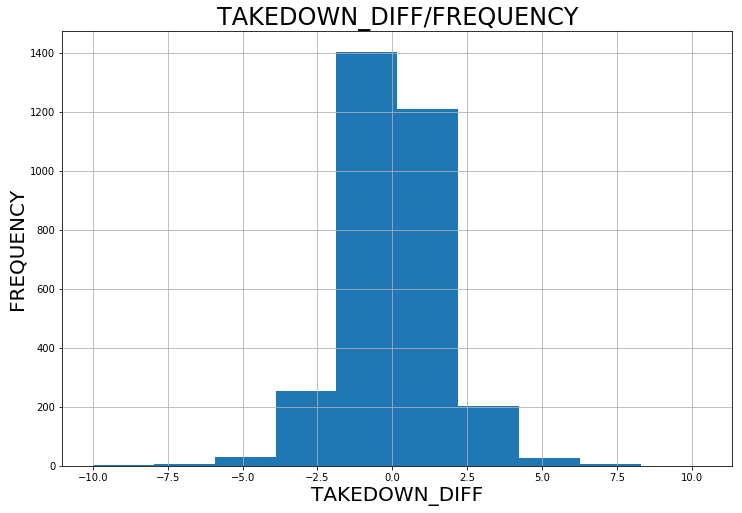

In [94]:
plt.figure(figsize=(12,8))
df['TAKEDOWN_DIFF'].hist()
plt.xlabel('TAKEDOWN_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('TAKEDOWN_DIFF/FREQUENCY', fontsize=24);

In [95]:
df['TAKEDOWN_ATT_DIFF'] = df['R_avg_TD_att'] \
                        - df['B_avg_TD_att']

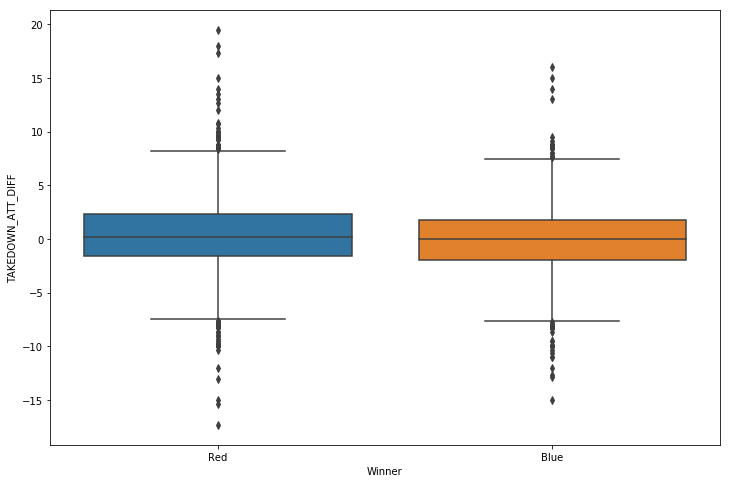

In [96]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'TAKEDOWN_ATT_DIFF', data=df);

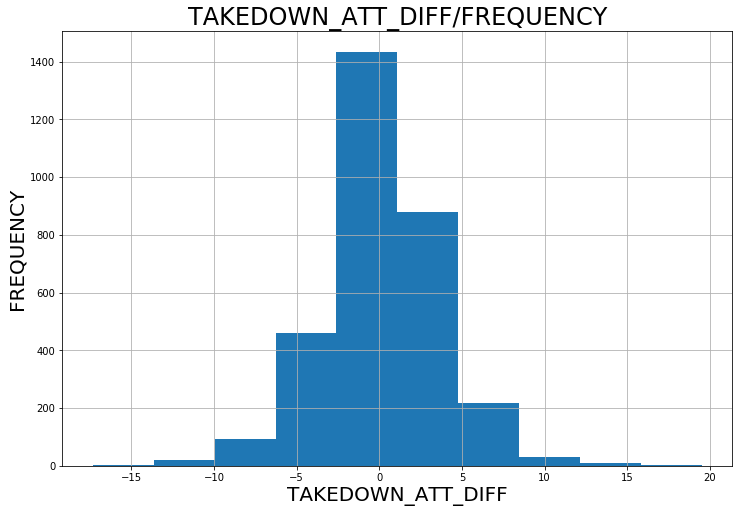

In [97]:
plt.figure(figsize=(12,8))
df['TAKEDOWN_ATT_DIFF'].hist()
plt.xlabel('TAKEDOWN_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('TAKEDOWN_ATT_DIFF/FREQUENCY', fontsize=24);

In [98]:
df['SUB_ATT_DIFF'] = df['R_avg_SUB_ATT'] \
                        - df['B_avg_SUB_ATT']

In [ ]:
B_avg_SUB_ATT

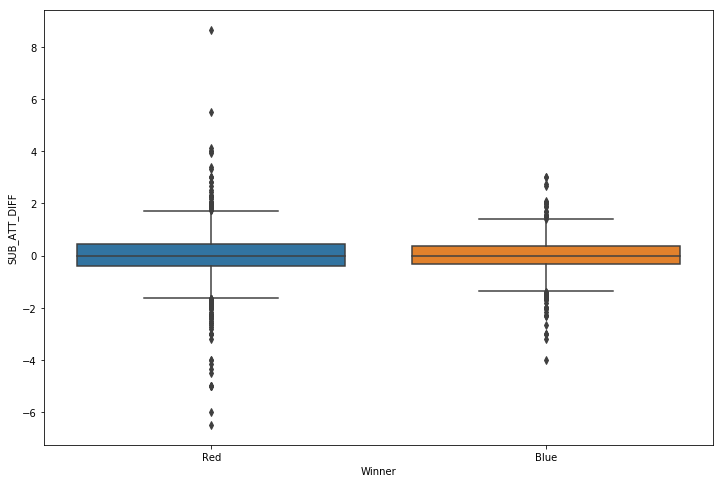

In [99]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'SUB_ATT_DIFF', data=df);

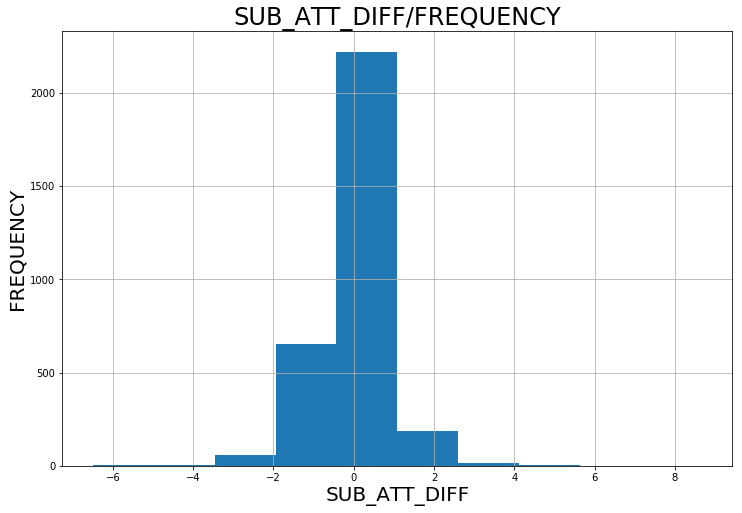

In [100]:
plt.figure(figsize=(12,8))
df['SUB_ATT_DIFF'].hist()
plt.xlabel('SUB_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('SUB_ATT_DIFF/FREQUENCY', fontsize=24);

In [101]:
df['SECONDS_FOUGHT_DIFF'] = df['R_total_time_fought(seconds)'] \
                        - df['B_total_time_fought(seconds)']

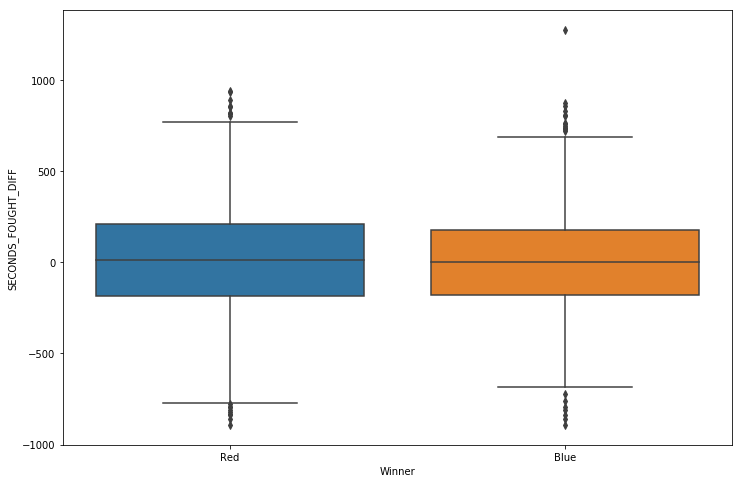

In [102]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'SECONDS_FOUGHT_DIFF', data=df);

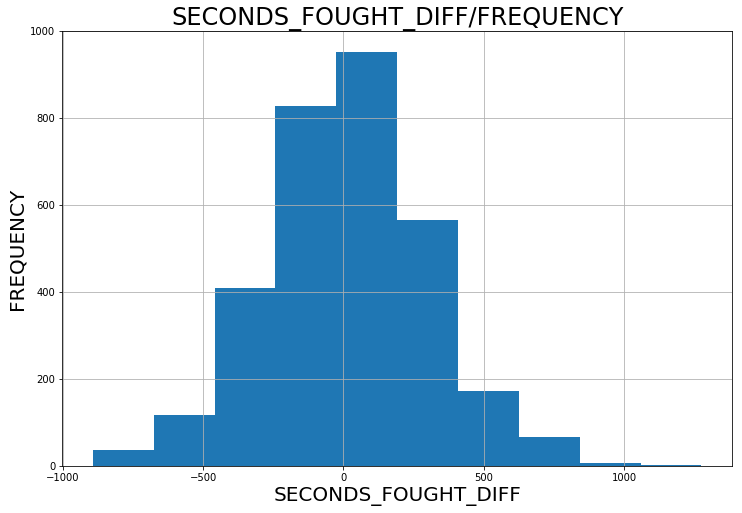

In [103]:
plt.figure(figsize=(12,8))
df['SECONDS_FOUGHT_DIFF'].hist()
plt.xlabel('SECONDS_FOUGHT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('SECONDS_FOUGHT_DIFF/FREQUENCY', fontsize=24);

In [ ]:
B_total_rounds_fought

In [104]:
df['TOT_ROUND_FOUGHT_DIFF'] = df['R_total_rounds_fought'] \
                        - df['B_total_rounds_fought']

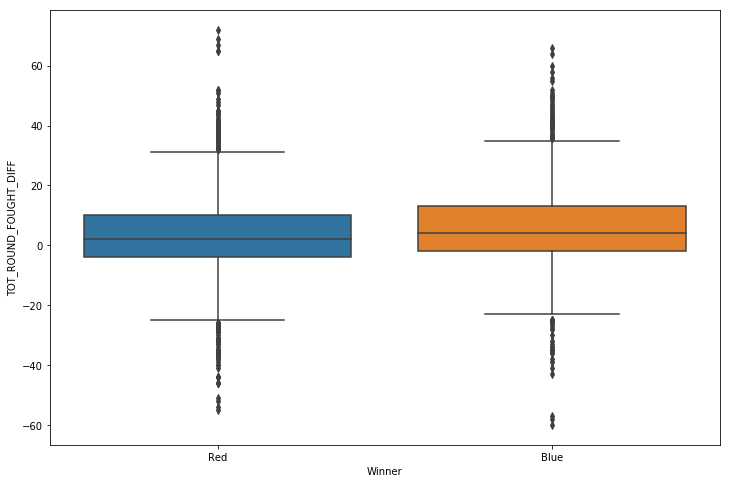

In [105]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'TOT_ROUND_FOUGHT_DIFF', data=df);

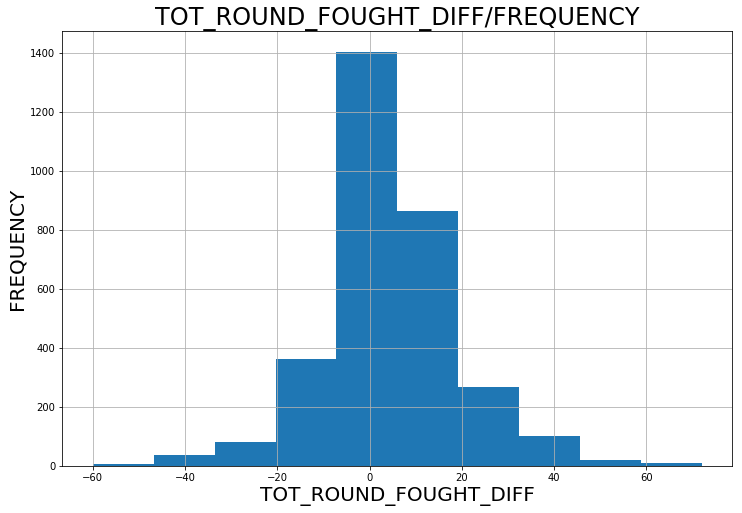

In [106]:
plt.figure(figsize=(12,8))
df['TOT_ROUND_FOUGHT_DIFF'].hist()
plt.xlabel('TOT_ROUND_FOUGHT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('TOT_ROUND_FOUGHT_DIFF/FREQUENCY', fontsize=24);

In [107]:
df['LONG_WIN_STREAK'] = df['R_longest_win_streak'] \
                        - df['B_longest_win_streak']

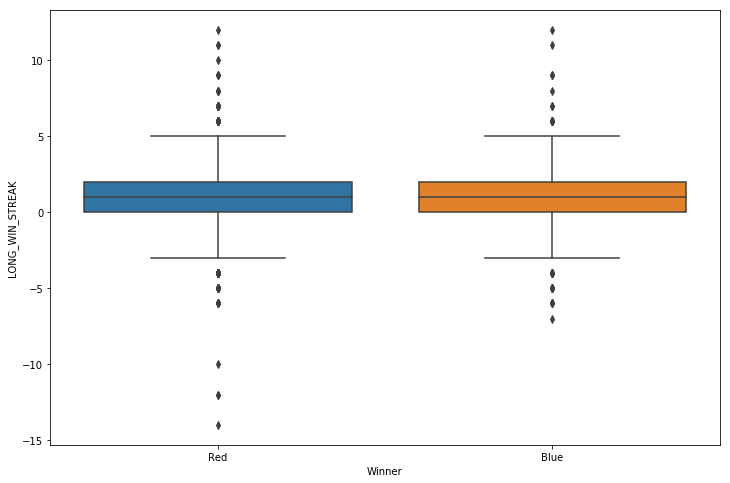

In [108]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'LONG_WIN_STREAK', data=df);

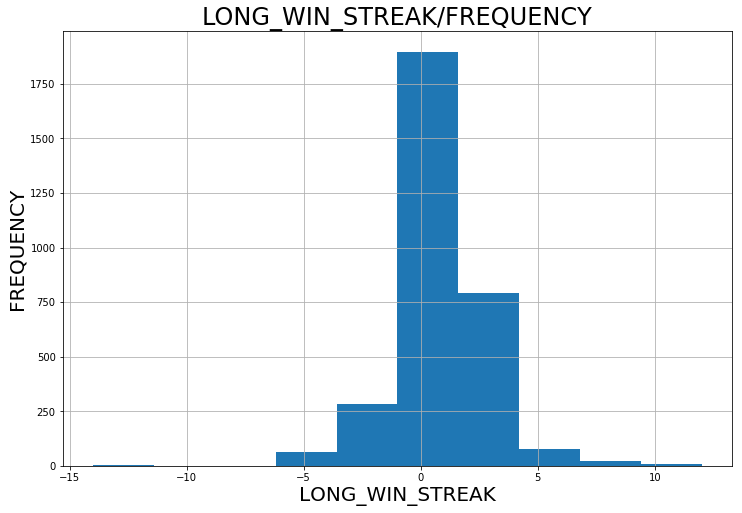

In [109]:
plt.figure(figsize=(12,8))
df['LONG_WIN_STREAK'].hist()
plt.xlabel('LONG_WIN_STREAK', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('LONG_WIN_STREAK/FREQUENCY', fontsize=24);

In [110]:
df['LOSE_STREAK'] = df['R_current_lose_streak'] \
                        - df['B_current_lose_streak']

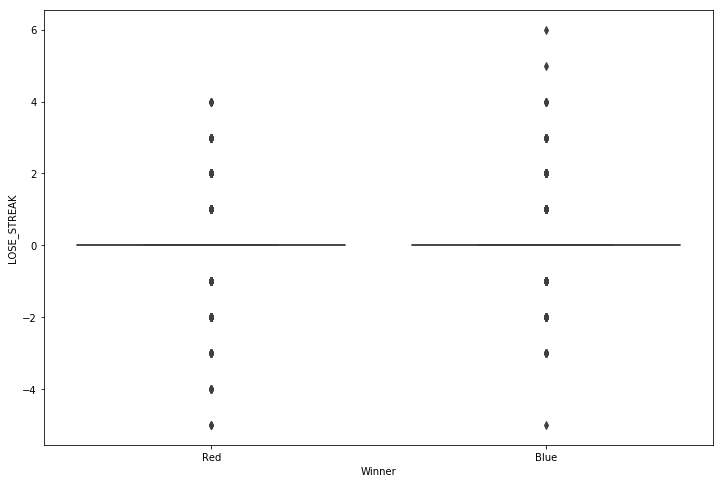

In [111]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'LOSE_STREAK', data=df);

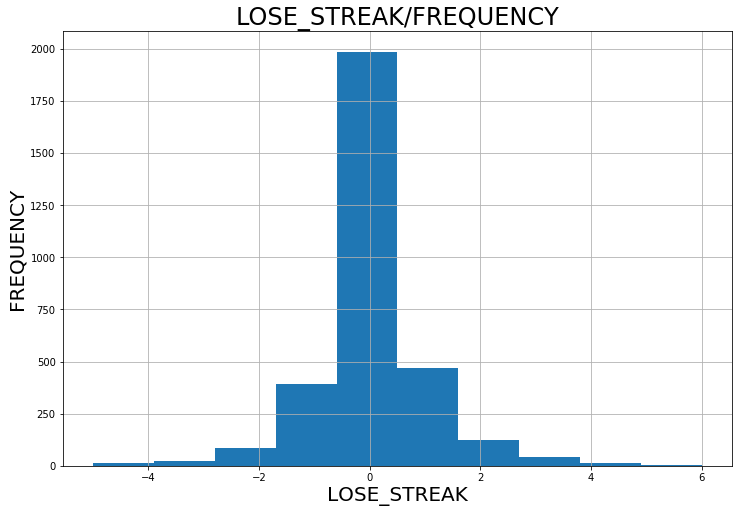

In [112]:
plt.figure(figsize=(12,8))
df['LOSE_STREAK'].hist()
plt.xlabel('LOSE_STREAK', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('LOSE_STREAK/FREQUENCY', fontsize=24);

In [113]:
df['WIN_STREAK'] = df['R_current_win_streak'] \
                        - df['B_current_win_streak']

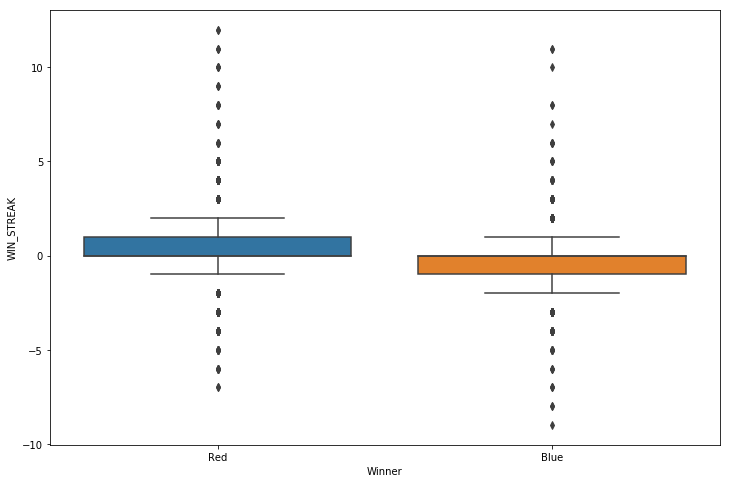

In [114]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'WIN_STREAK', data=df);

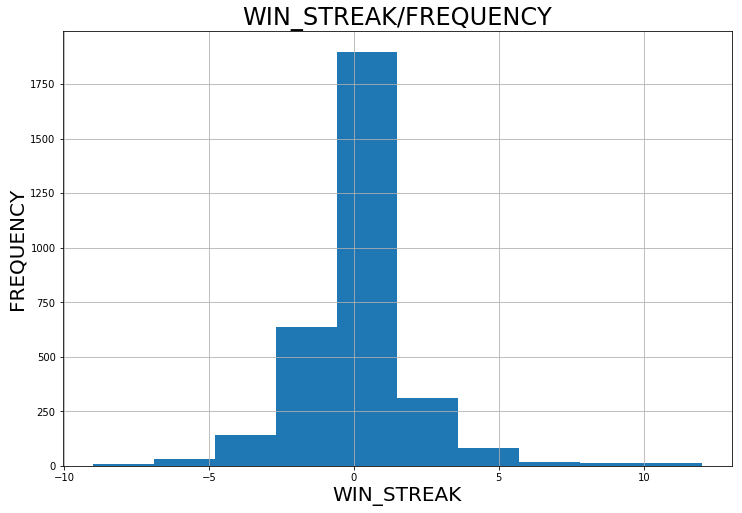

In [115]:
plt.figure(figsize=(12,8))
df['WIN_STREAK'].hist()
plt.xlabel('WIN_STREAK', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('WIN_STREAK/FREQUENCY', fontsize=24);

In [116]:
df['TOT_LOSSES_DIFF'] = df['R_losses'] \
                        - df['B_losses']

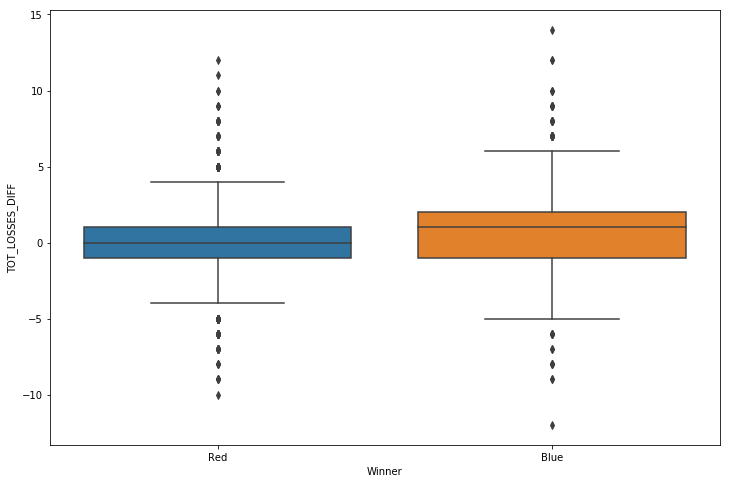

In [117]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'TOT_LOSSES_DIFF', data=df);

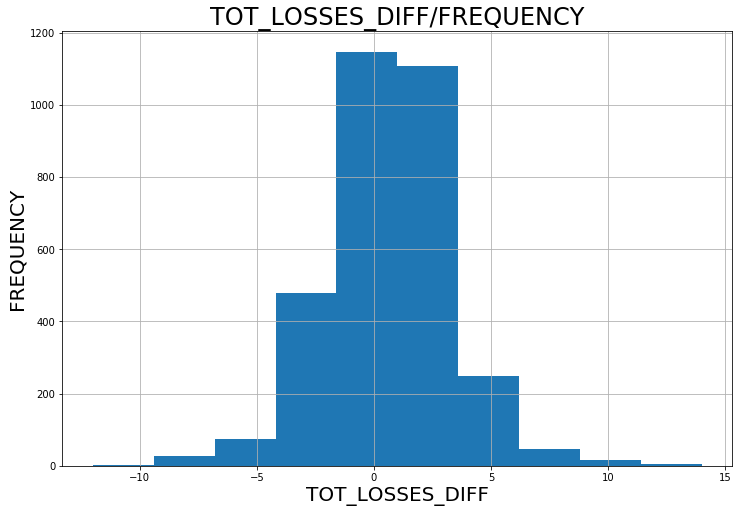

In [118]:
plt.figure(figsize=(12,8))
df['TOT_LOSSES_DIFF'].hist()
plt.xlabel('TOT_LOSSES_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('TOT_LOSSES_DIFF/FREQUENCY', fontsize=24);

At this point I'm going to check again Random Forest for features importance includind this time our new columns.

In [119]:
X = df.drop('Winner', axis=1)
y = df['Winner']

In [120]:
X = X.select_dtypes(exclude=['object'])
list(X.dtypes)

[dtype('bool'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64')

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [122]:
# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = clf.fit(X_train, y_train)

C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [123]:
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance',ascending=False,inplace=True)
importances.head(30)
#importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45, figsize=(12,8))

,Gini-importance
AGE_DIFF,0.021715
REV_DIFF,0.015552
B_avg_BODY_att,0.015331
B_avg_BODY_landed,0.015111
B_avg_GROUND_landed,0.014850
R_avg_LEG_att,0.014666
R_avg_TD_pct,0.014464
B_avg_HEAD_att,0.014100
R_avg_TD_att,0.013696
TOT_STR_DIFF,0.013557


In [256]:
df4 = df[['AGE_DIFF','REV_DIFF', 'TOT_STR_DIFF', 'TOT_ROUND_FOUGHT_DIFF', 
          'TAKEDOWN_ATT_DIFF', 'SECONDS_FOUGHT_DIFF', 'HEAD_STR_DIFF', 'LEG_DIFF',
          'TOT_LOSSES_DIFF', 'SIG_STR_ATT_DIFF', 'GROUND_STR_DIFF', 'TAKEDOWN_DIFF', 'Winner']]
df4.head()

,AGE_DIFF,REV_DIFF,TOT_STR_DIFF,TOT_ROUND_FOUGHT_DIFF,TAKEDOWN_ATT_DIFF,SECONDS_FOUGHT_DIFF,HEAD_STR_DIFF,LEG_DIFF,TOT_LOSSES_DIFF,SIG_STR_ATT_DIFF,GROUND_STR_DIFF,TAKEDOWN_DIFF,Winner
0,1.0,0.000000,45.500000,18.0,4.500000,323.200000,12.700000,-1.700000,1.0,36.000000,4.500000,1.700000,Red
1,-1.0,0.142857,33.257143,-4.0,4.142857,213.000000,5.000000,4.514286,-4.0,-23.042857,14.528571,1.928571,Red
2,-1.0,0.036559,10.851613,-35.0,-1.227957,22.529032,12.341935,-0.993548,-7.0,27.333333,0.460215,-0.277419,Red
3,3.0,-0.250000,-36.000000,11.0,-0.250000,38.250000,-29.750000,9.000000,2.0,-24.500000,-9.875000,-0.625000,Blue
4,-6.0,0.000000,-29.250000,-1.0,0.500000,-759.250000,-22.250000,1.000000,0.0,-141.250000,0.500000,0.000000,Blue


As we can see 3 of the new features are in the top3 for our new Model.

It's time now to start building a new model adding new features for a new model and evaluating its goodness. 

# using only age as variable

In [226]:
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [227]:
try:
    from StringIO import StringIO ## for Python 2
except ImportError:
    from io import StringIO ## for Python 3

In [228]:
def evaluate_models(X, y, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    # Train a LogRegr classifier
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    # Calculate Score
    train_score_logreg = clf.score(X_train, y_train)
    test_score_logreg = clf.score(X_test, y_test)
    print("LogReg Train score: ", train_score_logreg)
    print("LogReg Test score: ", test_score_logreg)
    print("\n")
    # Train a DT classifier
    clf_dec_tree = DecisionTreeClassifier(random_state=10, criterion='entropy', max_depth=3)  
    clf_dec_tree.fit(X_train, y_train)  
    # Make predictions for test data
    # Calculate Score
    train_score_dectree = clf_dec_tree.score(X_train, y_train)
    test_score_dectree = clf_dec_tree.score(X_test, y_test)
    print("DecTree Train score: ", train_score_dectree)
    print("DecTree Test score: ", test_score_dectree)
    print("\n")
    # Create and print a confusion matrix 
    print('\nConfusion Matrix')
    print('----------------')
    print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
    
    # Visualize the tree trained from complete dataset
    
    
    dot_data = StringIO()
    export_graphviz(clf_dec_tree, out_file=dot_data, filled=True, rounded=True,special_characters=True,
                    feature_names=X.columns, class_names= ['red', 'blue']
                    )
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    img = Image(graph.create_png())
    return img, name, train_score_logreg, test_score_logreg, train_score_dectree, test_score_dectree

In [229]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.figure(figsize=(12,8))

In [230]:
df1 = df[['AGE_DIFF','REV_DIFF', 'TOT_STR_DIFF', 'Winner']]
df1.head()

,AGE_DIFF,REV_DIFF,TOT_STR_DIFF,Winner
0,1.0,0.000000,45.500000,Red
1,-1.0,0.142857,33.257143,Red
2,-1.0,0.036559,10.851613,Red
3,3.0,-0.250000,-36.000000,Blue
4,-6.0,0.000000,-29.250000,Blue


In [231]:
X = df1.drop('Winner', axis=1)
y = df1['Winner']

In [232]:
X.shape

(3150, 3)

In [233]:
y.shape

(3150,)

In [234]:
im, nm, lr_train, lr_test, dt_train, dt_test = evaluate_models(X, y, 'model_1')

C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogReg Train score:  0.6566469093988145
LogReg Test score:  0.618020304568528


DecTree Train score:  0.657493649449619
DecTree Test score:  0.6154822335025381



Confusion Matrix
----------------
Predicted  Blue  Red  All
True                     
Blue         22  285  307
Red          12  469  481
All          34  754  788


In [235]:
nm

'model_1'

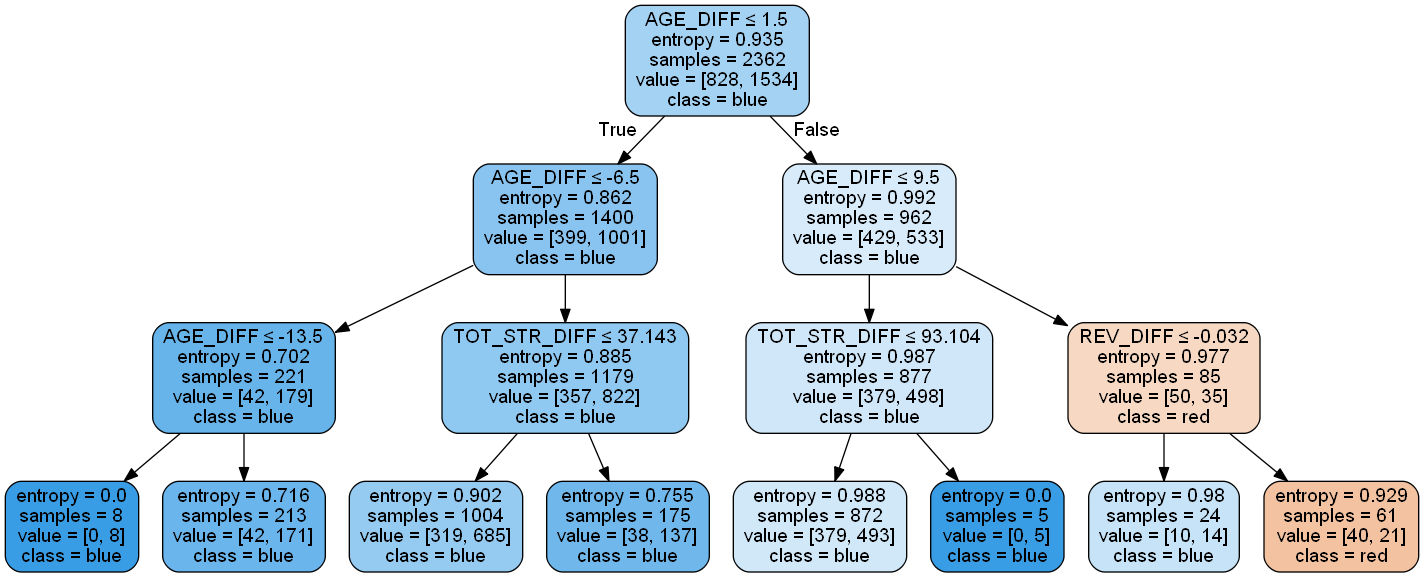

In [236]:
im

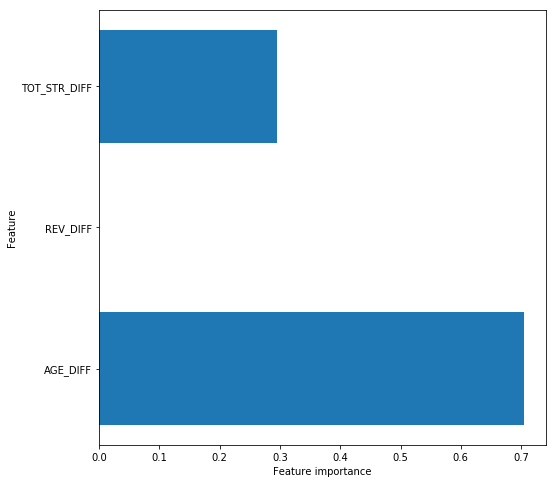

<Figure size 864x576 with 0 Axes>

In [237]:
plot_feature_importances(clf_dec_tree);

In [238]:
clf.classes_

array(['Blue', 'Red'], dtype=object)

In [239]:
for x, y in zip(clf.coef_[0], ['AGE_DIFF','REV_DIFF', 'TOT_STR_DIFF']):
    print(f'{y} {x}')

AGE_DIFF -0.07580879563517205
REV_DIFF -0.00045004583406858757
TOT_STR_DIFF 0.01653680829765839


# Df2

In [240]:
df2 = df[['AGE_DIFF','REV_DIFF', 'TOT_STR_DIFF', 'TOT_ROUND_FOUGHT_DIFF', 'TAKEDOWN_ATT_DIFF', 'Winner']]
df2.head()

,AGE_DIFF,REV_DIFF,TOT_STR_DIFF,TOT_ROUND_FOUGHT_DIFF,TAKEDOWN_ATT_DIFF,Winner
0,1.0,0.000000,45.500000,18.0,4.500000,Red
1,-1.0,0.142857,33.257143,-4.0,4.142857,Red
2,-1.0,0.036559,10.851613,-35.0,-1.227957,Red
3,3.0,-0.250000,-36.000000,11.0,-0.250000,Blue
4,-6.0,0.000000,-29.250000,-1.0,0.500000,Blue


In [241]:
X = df2.drop('Winner', axis=1)
y = df2['Winner']

In [242]:
im, nm, lr_train, lr_test, dt_train, dt_test = evaluate_models(X, y, 'model_2')

C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogReg Train score:  0.6591871295512278
LogReg Test score:  0.6218274111675127


DecTree Train score:  0.6629974597798476
DecTree Test score:  0.6129441624365483



Confusion Matrix
----------------
Predicted  Blue  Red  All
True                     
Blue         22  285  307
Red          12  469  481
All          34  754  788


In [243]:
nm

'model_2'

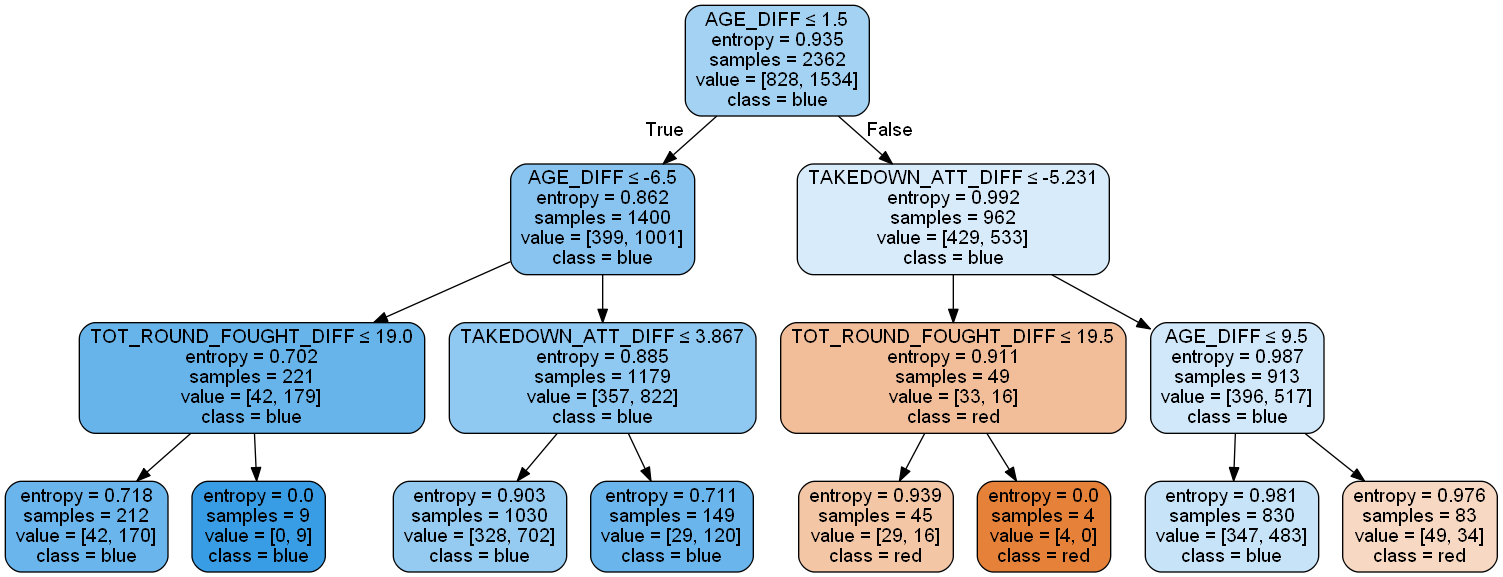

In [244]:
im

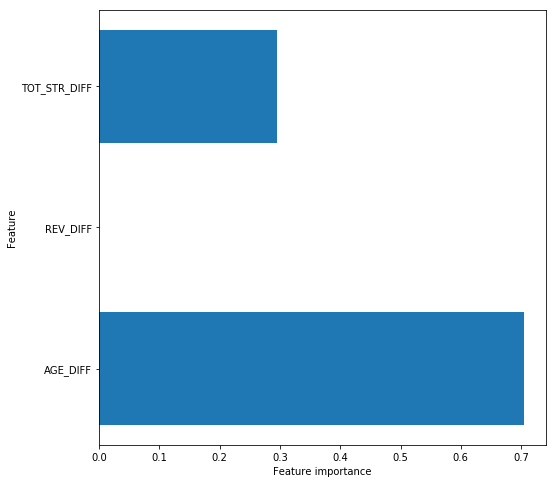

<Figure size 864x576 with 0 Axes>

In [245]:
plot_feature_importances(clf_dec_tree)

In [224]:
for x, y in zip(clf.coef_[0], ['AGE_DIFF','REV_DIFF', 'TOT_STR_DIFF', 'TOT_ROUND_FOUGHT_DIFF', 'TAKEDOWN_ATT_DIFF']):
    print(f'{y} {x}')

AGE_DIFF -0.07580879563517205
REV_DIFF -0.00045004583406858757
TOT_STR_DIFF 0.01653680829765839


# Df3

In [247]:
df3 = df[['AGE_DIFF','REV_DIFF', 'TOT_STR_DIFF', 'TOT_ROUND_FOUGHT_DIFF', 
          'TAKEDOWN_ATT_DIFF', 'SECONDS_FOUGHT_DIFF', 'HEAD_STR_DIFF', 'LEG_DIFF', 'Winner']]
df3.head()

,AGE_DIFF,REV_DIFF,TOT_STR_DIFF,TOT_ROUND_FOUGHT_DIFF,TAKEDOWN_ATT_DIFF,SECONDS_FOUGHT_DIFF,HEAD_STR_DIFF,LEG_DIFF,Winner
0,1.0,0.000000,45.500000,18.0,4.500000,323.200000,12.700000,-1.700000,Red
1,-1.0,0.142857,33.257143,-4.0,4.142857,213.000000,5.000000,4.514286,Red
2,-1.0,0.036559,10.851613,-35.0,-1.227957,22.529032,12.341935,-0.993548,Red
3,3.0,-0.250000,-36.000000,11.0,-0.250000,38.250000,-29.750000,9.000000,Blue
4,-6.0,0.000000,-29.250000,-1.0,0.500000,-759.250000,-22.250000,1.000000,Blue


In [248]:
X = df3.drop('Winner', axis=1)
y = df3['Winner']

In [251]:
im, nm, lr_train, lr_test, dt_train, dt_test = evaluate_models(X, y, 'model_3')

C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogReg Train score:  0.6663844199830652
LogReg Test score:  0.6218274111675127


DecTree Train score:  0.663844199830652
DecTree Test score:  0.616751269035533



Confusion Matrix
----------------
Predicted  Blue  Red  All
True                     
Blue         22  285  307
Red          12  469  481
All          34  754  788


In [252]:
nm

'model_3'

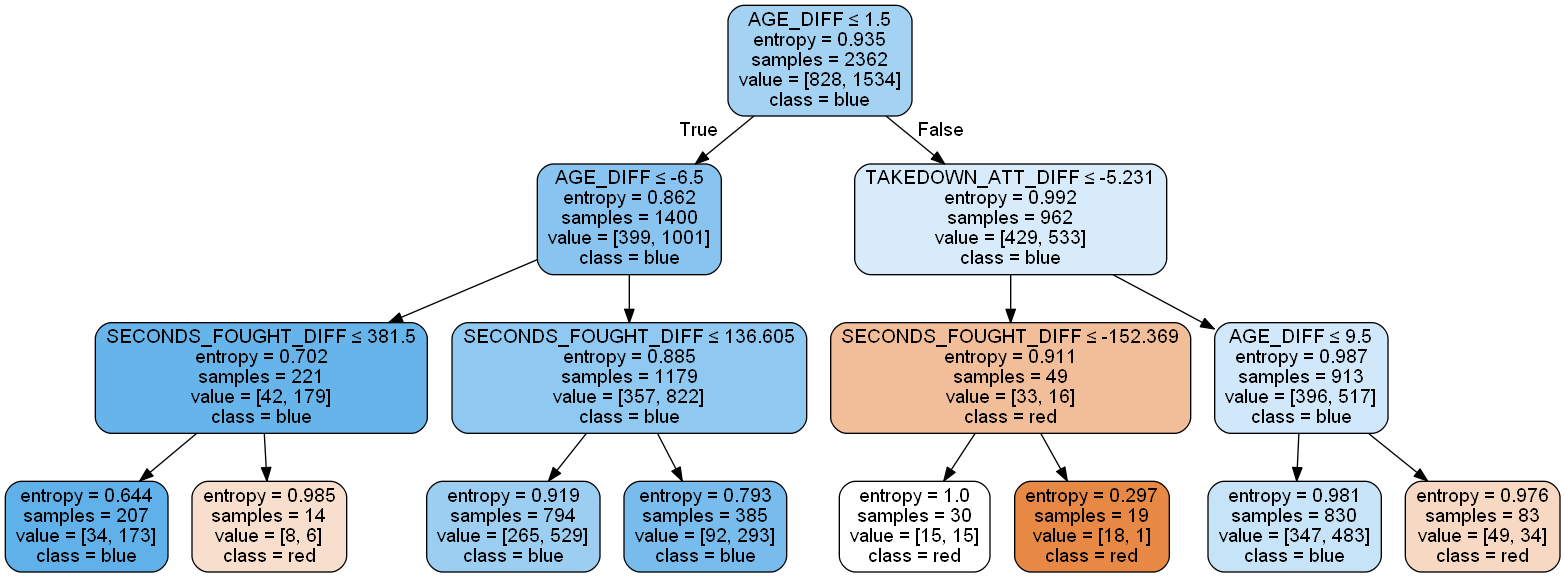

In [253]:
im

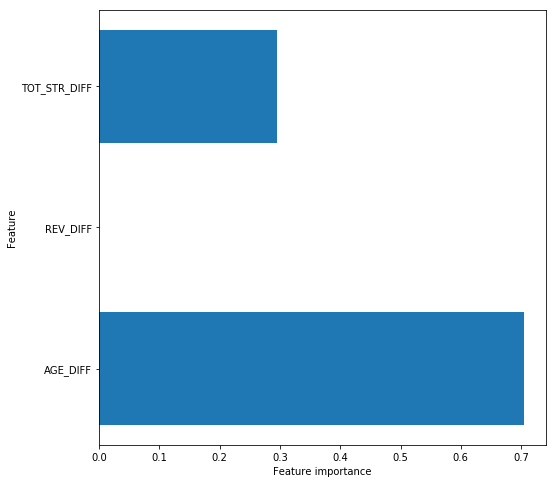

<Figure size 864x576 with 0 Axes>

In [254]:
plot_feature_importances(clf_dec_tree)

In [255]:
for x, y in zip(clf.coef_[0], ['AGE_DIFF','REV_DIFF', 'TOT_STR_DIFF', 'TOT_ROUND_FOUGHT_DIFF', 
          'TAKEDOWN_ATT_DIFF', 'SECONDS_FOUGHT_DIFF', 'HEAD_STR_DIFF', 'LEG_DIFF']):
    print(f'{y} {x}')

AGE_DIFF -0.07580879563517205
REV_DIFF -0.00045004583406858757
TOT_STR_DIFF 0.01653680829765839


# Df4

In [257]:
df4 = df[['AGE_DIFF','REV_DIFF', 'TOT_STR_DIFF', 'TOT_ROUND_FOUGHT_DIFF', 
          'TAKEDOWN_ATT_DIFF', 'SECONDS_FOUGHT_DIFF', 'HEAD_STR_DIFF', 'LEG_DIFF',
          'TOT_LOSSES_DIFF', 'SIG_STR_ATT_DIFF', 'GROUND_STR_DIFF', 'TAKEDOWN_DIFF', 'Winner']]
df4.head()

,AGE_DIFF,REV_DIFF,TOT_STR_DIFF,TOT_ROUND_FOUGHT_DIFF,TAKEDOWN_ATT_DIFF,SECONDS_FOUGHT_DIFF,HEAD_STR_DIFF,LEG_DIFF,TOT_LOSSES_DIFF,SIG_STR_ATT_DIFF,GROUND_STR_DIFF,TAKEDOWN_DIFF,Winner
0,1.0,0.000000,45.500000,18.0,4.500000,323.200000,12.700000,-1.700000,1.0,36.000000,4.500000,1.700000,Red
1,-1.0,0.142857,33.257143,-4.0,4.142857,213.000000,5.000000,4.514286,-4.0,-23.042857,14.528571,1.928571,Red
2,-1.0,0.036559,10.851613,-35.0,-1.227957,22.529032,12.341935,-0.993548,-7.0,27.333333,0.460215,-0.277419,Red
3,3.0,-0.250000,-36.000000,11.0,-0.250000,38.250000,-29.750000,9.000000,2.0,-24.500000,-9.875000,-0.625000,Blue
4,-6.0,0.000000,-29.250000,-1.0,0.500000,-759.250000,-22.250000,1.000000,0.0,-141.250000,0.500000,0.000000,Blue


In [258]:
X = df4.drop('Winner', axis=1)
y = df4['Winner']

In [259]:
im, nm, lr_train, lr_test, dt_train, dt_test = evaluate_models(X, y, 'model_4')

C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogReg Train score:  0.6587637595258256
LogReg Test score:  0.6205583756345178


DecTree Train score:  0.6685012701100762
DecTree Test score:  0.631979695431472



Confusion Matrix
----------------
Predicted  Blue  Red  All
True                     
Blue         22  285  307
Red          12  469  481
All          34  754  788


In [260]:
nm

'model_4'

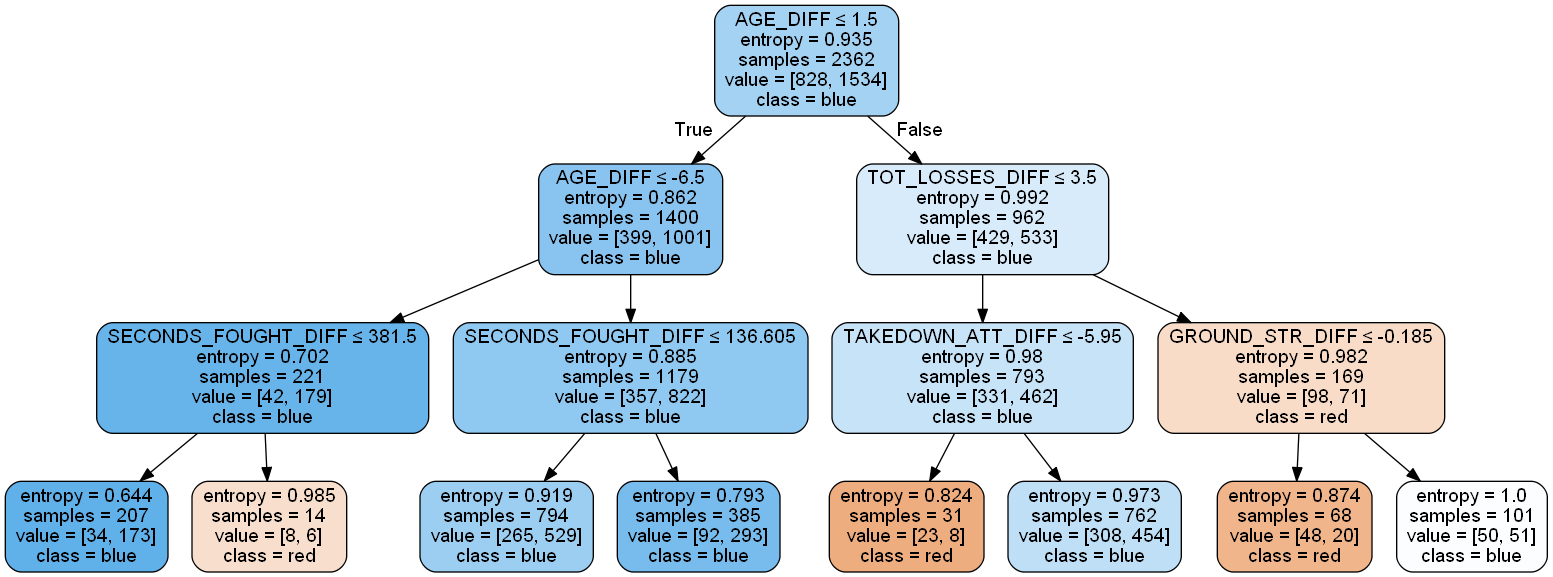

In [261]:
im

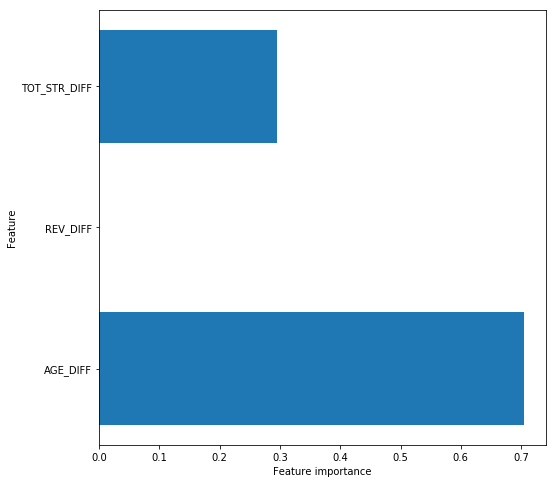

<Figure size 864x576 with 0 Axes>

In [262]:
plot_feature_importances(clf_dec_tree)

Accuracy is :62.30964467005076

Confusion Matrix
----------------
Predicted  Blue  Red  All
True                     
Blue         22  285  307
Red          12  469  481
All          34  754  788


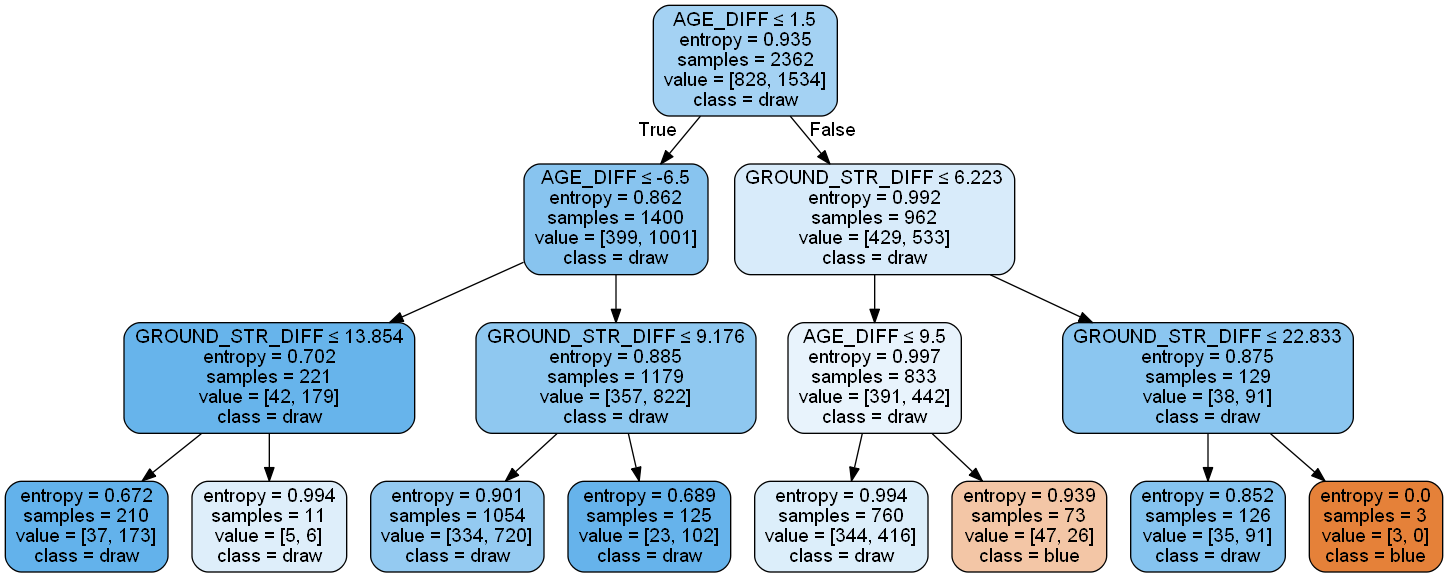

In [152]:
# Train a DT classifier
clf_dec_tree = DecisionTreeClassifier(random_state=10, criterion='entropy', max_depth=3)  
clf_dec_tree.fit(X_train, y_train)  
# Make predictions for test data
y_pred = clf_dec_tree.predict(X_test) 
# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

# Visualize the tree trained from complete dataset (optional)

dot_data = StringIO()
export_graphviz(clf_dec_tree, out_file=dot_data, filled=True, rounded=True,special_characters=True, 
                feature_names=X.columns, class_names= ['blue', 'draw', 'no contest', 'red']
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


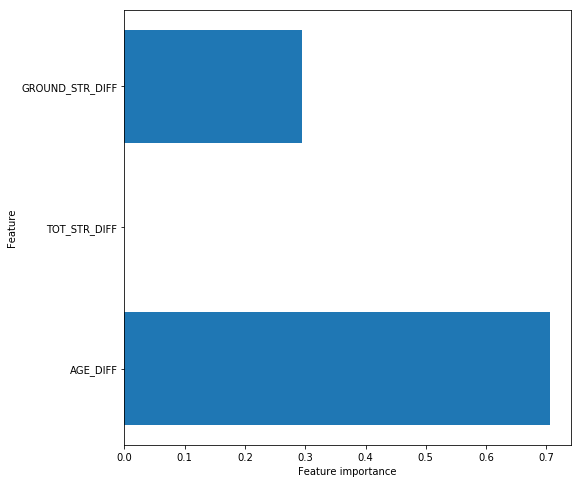

<Figure size 864x576 with 0 Axes>

In [153]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.figure(figsize=(12,8))

plot_feature_importances(clf_dec_tree)

In [154]:
new_df_1 = new_df.copy()

NameError: name 'new_df' is not defined

In [155]:
new_df_1['age difference'] = new_df_1['R_Age'] - new_df_1['B_Age']
new_df_1.head(3)

NameError: name 'new_df_1' is not defined

In [156]:
X = new_df.drop('winner', axis=1)
y = new_df['winner']

NameError: name 'new_df' is not defined

NameError: name 'new_df' is not defined

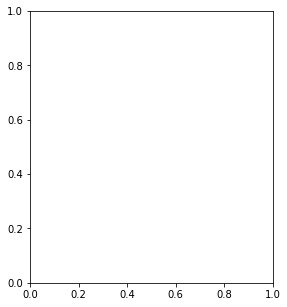

In [157]:
# Create scatter plots for each feature vs. target
plt.figure(figsize=(20, 5))
for i, col in enumerate(X.columns):
    plt.subplot(1, 4, i+1)
    plt.plot(new_df[col], y, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Prices')x
    plt.tight_layout()

In [ ]:
new_df['winner'].value_counts()

In [ ]:
df_no_cont = new_df[(new_df['winner'] != 'no contest') & (new_df['winner'] != 'draw')]
df_no_cont['winner'].value_counts()

In [ ]:
X.isnull().sum()

In [ ]:
X.fillna(value=0, inplace=True)
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Train a LogRegr classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)
# Calculate Score
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print(train_score)

In [192]:
def evaluate_models(X, y, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    # Train a LogRegr classifier
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    # Calculate Score
    train_score_logreg = clf.score(X_train, y_train)
    test_score_logreg = clf.score(X_test, y_test)
    print("LogReg Train score: ", train_score_logreg)
    print("LogReg Test score: ", test_score_logreg)
    print("\n")
    # Train a DT classifier
    clf_dec_tree = DecisionTreeClassifier(random_state=10, criterion='entropy', max_depth=3)  
    clf_dec_tree.fit(X_train, y_train)  
    # Make predictions for test data
    # Calculate Score
    train_score_dectree = clf_dec_tree.score(X_train, y_train)
    test_score_dectree = clf_dec_tree.score(X_test, y_test)
    print("DecTree Train score: ", train_score_dectree)
    print("DecTree Test score: ", test_score_dectree)
    print("\n")
    # Create and print a confusion matrix 
    print('\nConfusion Matrix')
    print('----------------')
    print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
    
    # Visualize the tree trained from complete dataset
    
    
    dot_data = StringIO()
    export_graphviz(clf_dec_tree, out_file=dot_data, filled=True, rounded=True,special_characters=True,
                    feature_names=X.columns, class_names= ['red', 'blue']
                    )
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    img = Image(graph.create_png())
    return img, name, train_score_logreg, test_score_logreg, train_score_dectree, test_score_dectree
    

In [159]:
im, nm, lr_train, lr_test, dt_train, dt_test = evaluate_models(X, y, 'model_age_feature')

ValueError: Found input variables with inconsistent numbers of samples: [3150, 15]